In [2]:
# import everything for a linear regression model
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# plt
import matplotlib.pyplot as plt

import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
def reload_df():
    return pd.read_csv('cleaned_data.csv')

reload_df()

Time     Res_Freq  Amplitude   Phase  Sample_number  Peak  \
0       833.900697  1018.846491      0.210   86.46              6     1   
1      1413.399842  1023.293676      0.116   82.15              7     0   
2       706.900433  1034.926293      0.230   85.26              7     0   
3       816.100678  1036.716665      0.182   91.56              6     1   
4       937.850642  1040.173647      0.222   85.60             11     1   
...            ...          ...        ...     ...            ...   ...   
10355   724.450436  4242.385585      0.804  -98.87              7     0   
10356   112.250421  4247.288004      0.816  -98.51              7     0   
10357  1010.703809  4292.083372      0.560 -104.01              9     1   
10358   724.550442  4336.678654      0.562 -108.95              7     0   
10359   724.650448  4336.678654      0.562 -108.95              7     0   

       Before_compression  After_compression  Compression_ratio  \
0                   13.99               11.2           1.249107   
1                   14.33               11.3           1.268142   
2                   14.33               11.3           1.268142   
3                   13.99               11.2           1.249107   
4                   14.33               11.3           1.268142   
...                   ...                ...                ...   
10355               14.33               11.3           1.268142   
10356               14.33               11.3           1.268142   
10357               12.80               10.3           1.242718   
10358               14.33               11.3           1.268142   
10359               14.33               11.3           1.268142   

       Compression_time  
0            170.050727  
1            370.401184  
2            370.401184  
3            170.050727  
4            217.408437  
...                 ...  
10355        370.401184  
10356        370.401184  
10357        250.944352  
10358        370.401184  
10359        370.401184  

[10360 rows x 10 columns]

In [4]:
# df = pd.DataFrame(columns=["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"])
# create a model for linear regression on the data. you need to use the following columns:
# "Res_Freq", "Amplitude", "compression_ratio"
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio"]]
y = df["Compression_time"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),  # 3 input features (Res_Freq, Amplitude, Compression_ratio)
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the prediction (Compression_time)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")



Epoch 1/10


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


234/234 [==============================] - 1s 1ms/step - loss: 55500.3867 - val_loss: 54049.1016
Epoch 2/10
234/234 [==============================] - 0s 747us/step - loss: 55375.4688 - val_loss: 53926.3438
Epoch 3/10
234/234 [==============================] - 0s 721us/step - loss: 55251.2891 - val_loss: 53803.6992
Epoch 4/10
234/234 [==============================] - 0s 751us/step - loss: 55127.7617 - val_loss: 53681.5820
Epoch 5/10
234/234 [==============================] - 0s 721us/step - loss: 55004.0703 - val_loss: 53559.4609
Epoch 6/10
234/234 [==============================] - 0s 717us/step - loss: 54881.0977 - val_loss: 53437.8594
Epoch 7/10
234/234 [==============================] - 0s 751us/step - loss: 54758.0195 - val_loss: 53316.2109
Epoch 8/10
234/234 [==============================] - 0s 712us/step - loss: 54635.6094 - val_loss: 53195.3789
Epoch 9/10
234/234 [==============================] - 0s 704us/step - loss: 54513.2734 - val_loss: 53074.5586
Epoch 10/10
65/65 [====

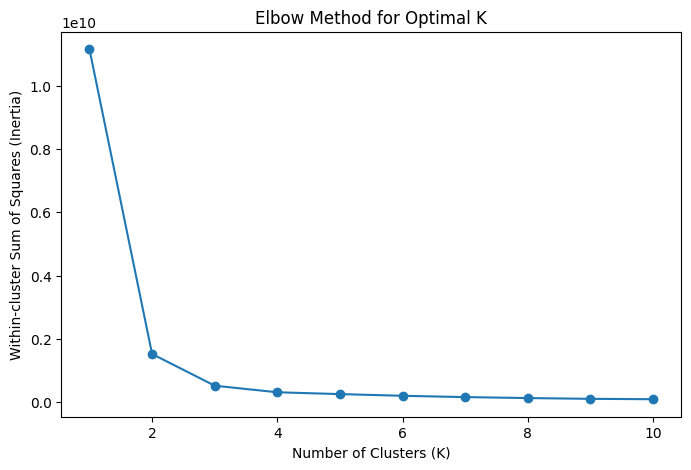

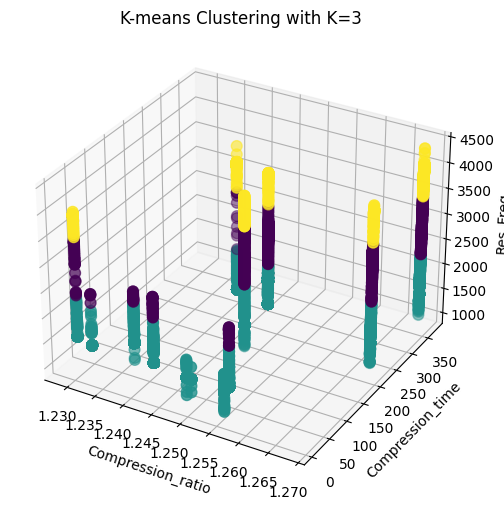

In [5]:
######### clustering :

# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)

# what to plot 
plot_cols = ["Compression_ratio", "Compression_time", "Res_Freq"]
# Select the features for clustering
df = reload_df()    
X = df[plot_cols]

# Determine the optimal number of clusters using the "elbow method"
# In the elbow method, we plot the within-cluster sum of squares (inertia) for different values of K (number of clusters).
# The "elbow" point on the plot indicates the optimal K value where increasing K further doesn't provide significant reduction in inertia.
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()
K_nb_Clusters = 3
# Based on the elbow curve, you can select the optimal number of clusters, let's say K=3
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=K_nb_Clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualize the clusters in 3D space (you can modify this based on the number of features)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# using plot_cols scatter and
ax.scatter(df[plot_cols[0]], df[plot_cols[1]], df[plot_cols[2]], c=df['Cluster'], s=60)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
ax.set_zlabel(plot_cols[2])
plt.title('K-means Clustering with K='+str(K_nb_Clusters))


plt.show()


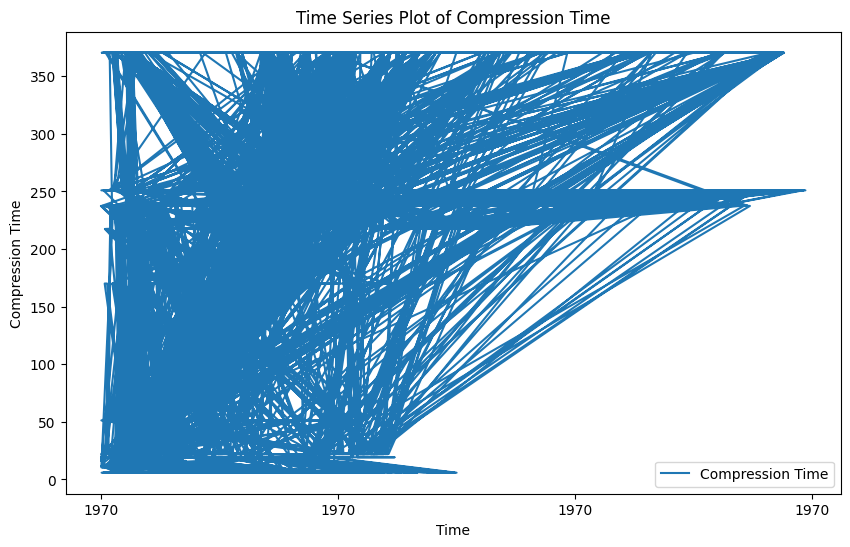

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

Mean Squared Error: 5449.812099992173


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\3759104533.py:45: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')


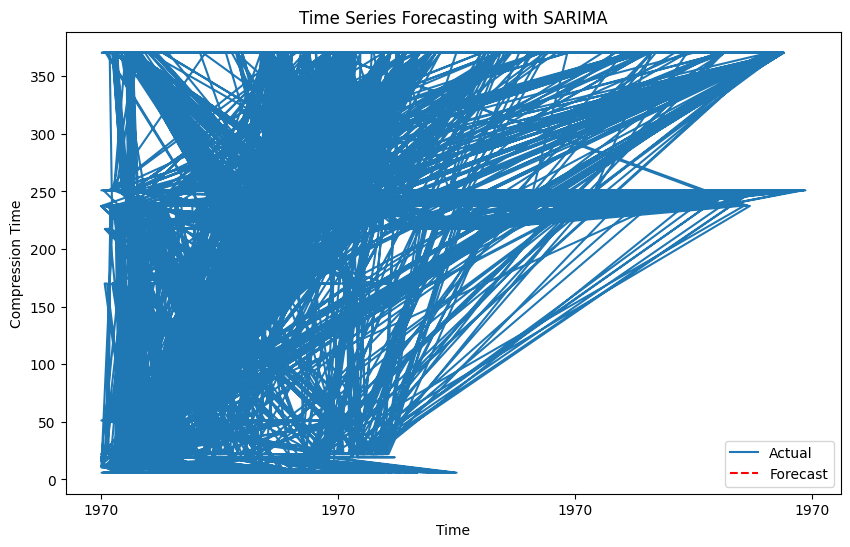

In [6]:
# Time analysis :

df = reload_df()    

# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)

# Convert the "Time" column to a datetime object and set it as the DataFrame's index
df["Time"] = pd.to_datetime(df["Time"])
df.set_index("Time", inplace=True)

# Step 1: Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Compression_time"], label="Compression Time")
plt.xlabel("Time")
plt.ylabel("Compression Time")
plt.title("Time Series Plot of Compression Time")
plt.legend()
plt.show()

# Step 2: SARIMA Modeling
# Define the order and seasonal_order parameters for SARIMA model
# The order parameter (p, d, q) corresponds to the non-seasonal part of the SARIMA model.
# The seasonal_order parameter (P, D, Q, S) corresponds to the seasonal part of the SARIMA model.
# S is the seasonal period (e.g., 12 for monthly data, 4 for quarterly data, etc.)
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming seasonality with a period of 12 (e.g., monthly data)

# Fit the SARIMA model
sarima_model = SARIMAX(df["Compression_time"], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions on the training data
predictions = sarima_model_fit.predict(start=0, end=len(df)-1)

# Calculate MSE
mse = mean_squared_error(df["Compression_time"], predictions)
print(f"Mean Squared Error: {mse}")

# Step 3: Time Series Forecasting
forecast_steps = 10  # Example: Forecasting the next 10 time steps
forecast = sarima_model_fit.forecast(steps=forecast_steps)

# Create a time index for the forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')

# Combine original data with forecasted values for visualization
combined_df = pd.concat([df, pd.DataFrame(forecast, index=forecast_index, columns=["Compression_time"])])
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df["Compression_time"], label="Actual")
plt.plot(combined_df.index[-forecast_steps:], combined_df["Compression_time"].iloc[-forecast_steps:], label="Forecast", color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Compression Time")
plt.title("Time Series Forecasting with SARIMA")
plt.legend()
plt.show()




Epoch 1/10
234/234 [==============================] - 1s 1ms/step - loss: 0.2411 - val_loss: 0.0405
Epoch 2/10
234/234 [==============================] - 0s 790us/step - loss: 0.0170 - val_loss: 0.0024
Epoch 3/10
234/234 [==============================] - 0s 785us/step - loss: 7.9322e-04 - val_loss: 2.8483e-04
Epoch 4/10
234/234 [==============================] - 0s 910us/step - loss: 2.3394e-04 - val_loss: 1.8983e-04
Epoch 5/10
234/234 [==============================] - 0s 807us/step - loss: 1.7619e-04 - val_loss: 1.4950e-04
Epoch 6/10
234/234 [==============================] - 0s 888us/step - loss: 1.5202e-04 - val_loss: 1.3448e-04
Epoch 7/10
234/234 [==============================] - 0s 906us/step - loss: 1.4227e-04 - val_loss: 1.3281e-04
Epoch 8/10
234/234 [==============================] - 0s 1ms/step - loss: 1.3811e-04 - val_loss: 1.3121e-04
Epoch 9/10
234/234 [==============================] - 0s 794us/step - loss: 1.3468e-04 - val_loss: 1.2232e-04
Epoch 10/10
65/65 [===========

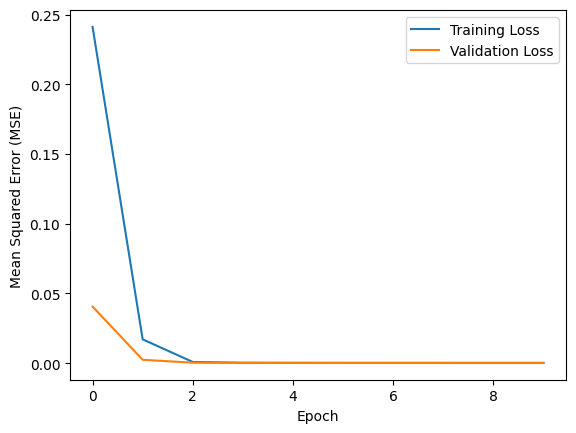

65/65 [==============================] - 0s 594us/step


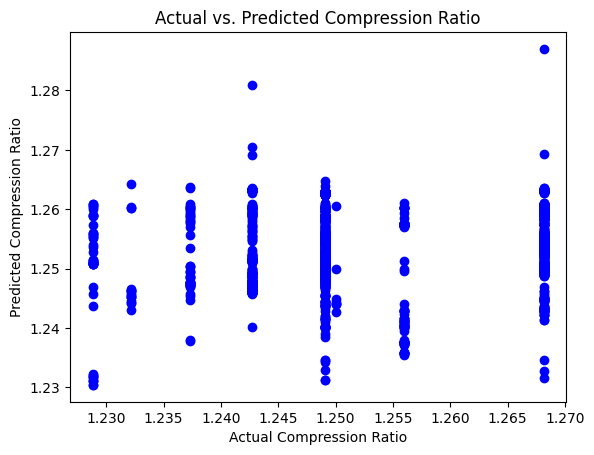

In [7]:

# Extract the features "Res_Freq" and "Amplitude"
X = df[["Res_Freq", "Amplitude"]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Assuming you have a target variable for the neural network (e.g., "Compression_time" or any other target variable you want to predict)
y = df["Compression_ratio"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),  # 2 input nodes for "Res_Freq" and "Amplitude"
    tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 nodes
    tf.keras.layers.Dense(1)  # Output node for the target variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values with different colors for actual and predicted values
plt.scatter(y_test, y_pred, c=['blue'])
plt.xlabel('Actual Compression Ratio')
plt.ylabel('Predicted Compression Ratio')
plt.title('Actual vs. Predicted Compression Ratio')
plt.show()

Mean Squared Error: 4.930380657631324e-32
R-squared: 1.0


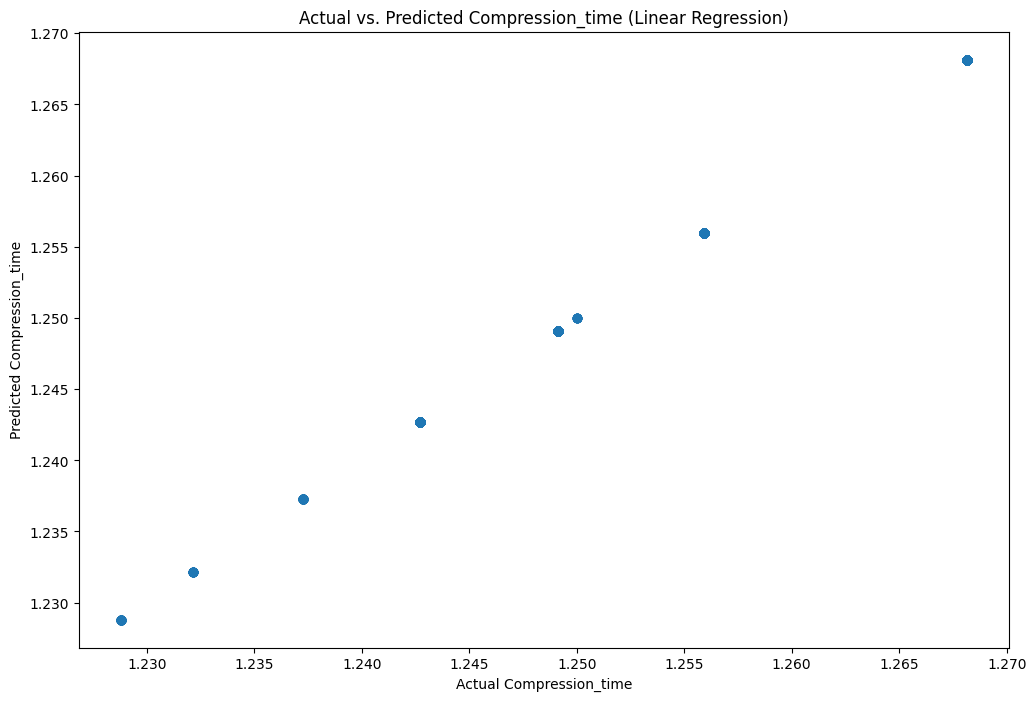

In [8]:

# Extract the features "Res_Freq", "Amplitude", and "compression_ratio"
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio"]]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#import linear regression
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data of the linear regression model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Compression_time")
plt.ylabel("Predicted Compression_time")
plt.title("Actual vs. Predicted Compression_time (Linear Regression)")
plt.show()

Epoch 1/10


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


234/234 [==============================] - 1s 2ms/step - loss: 55331.3008 - val_loss: 55657.9258
Epoch 2/10
234/234 [==============================] - 0s 1ms/step - loss: 55203.8125 - val_loss: 55534.1289
Epoch 3/10
234/234 [==============================] - 0s 798us/step - loss: 55077.4141 - val_loss: 55411.2812
Epoch 4/10
234/234 [==============================] - 0s 850us/step - loss: 54951.5703 - val_loss: 55288.6094
Epoch 5/10
234/234 [==============================] - 0s 764us/step - loss: 54825.6719 - val_loss: 55165.8320
Epoch 6/10
234/234 [==============================] - 0s 785us/step - loss: 54700.2227 - val_loss: 55044.0859
Epoch 7/10
234/234 [==============================] - 0s 815us/step - loss: 54575.1172 - val_loss: 54922.1211
Epoch 8/10
234/234 [==============================] - 0s 785us/step - loss: 54450.0977 - val_loss: 54800.4883
Epoch 9/10
234/234 [==============================] - 0s 781us/step - loss: 54325.9648 - val_loss: 54679.1875
Epoch 10/10
65/65 [======

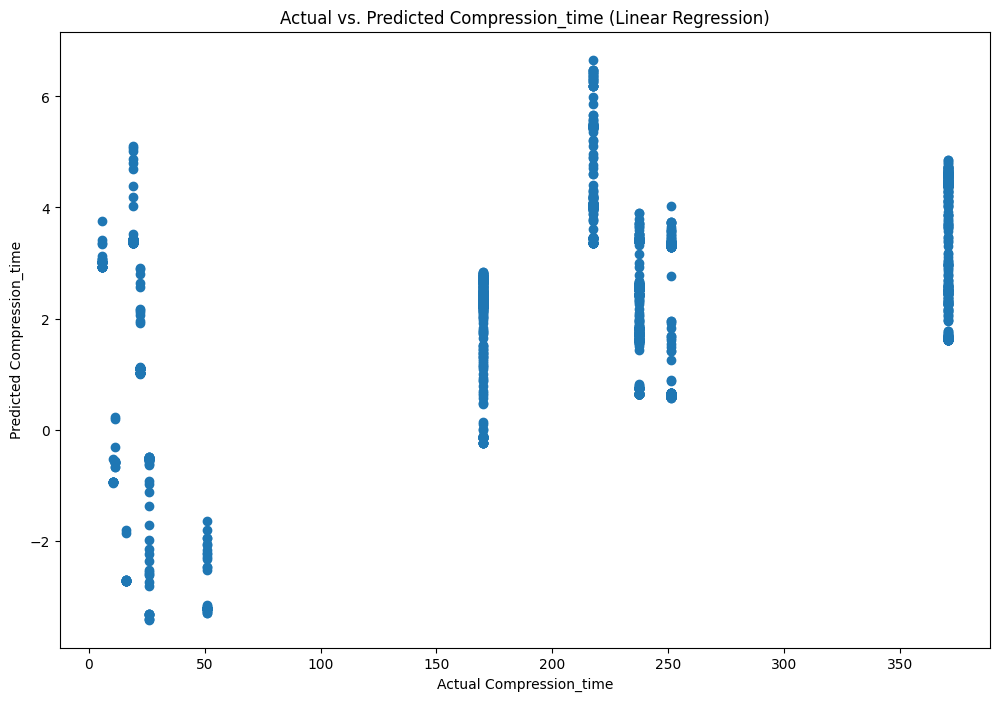

In [9]:
# model to predict the frequency curve with the compression ratio and the before and after compression but seperate it for sample

# Extract the features "Res_Freq", "Amplitude", and "compression_ratio" and sample number
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio", "Sample_number"]]
y = df["Compression_time"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # 4 input features (Res_Freq, Amplitude, Compression_ratio, Sample_number)
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the prediction (Compression_time)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data of the linear regression model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Compression_time")
plt.ylabel("Predicted Compression_time")
plt.title("Actual vs. Predicted Compression_time (Linear Regression)")

plt.show()


Epoch 1/10


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


234/234 [==============================] - 2s 2ms/step - loss: 55223.9375 - val_loss: 55488.7344
Epoch 2/10
234/234 [==============================] - 0s 1ms/step - loss: 55124.9297 - val_loss: 55390.5664
Epoch 3/10
234/234 [==============================] - 0s 906us/step - loss: 55026.1211 - val_loss: 55292.5898
Epoch 4/10
234/234 [==============================] - 0s 1ms/step - loss: 54927.7344 - val_loss: 55194.8984
Epoch 5/10
234/234 [==============================] - 0s 1ms/step - loss: 54829.4180 - val_loss: 55096.9023
Epoch 6/10
234/234 [==============================] - 0s 901us/step - loss: 54731.2695 - val_loss: 54998.6094
Epoch 7/10
234/234 [==============================] - 0s 845us/step - loss: 54633.1992 - val_loss: 54900.8359
Epoch 8/10
234/234 [==============================] - 0s 1ms/step - loss: 54535.4219 - val_loss: 54803.5508
Epoch 9/10
234/234 [==============================] - 0s 1ms/step - loss: 54437.6055 - val_loss: 54705.9727
Epoch 10/10
65/65 [==============

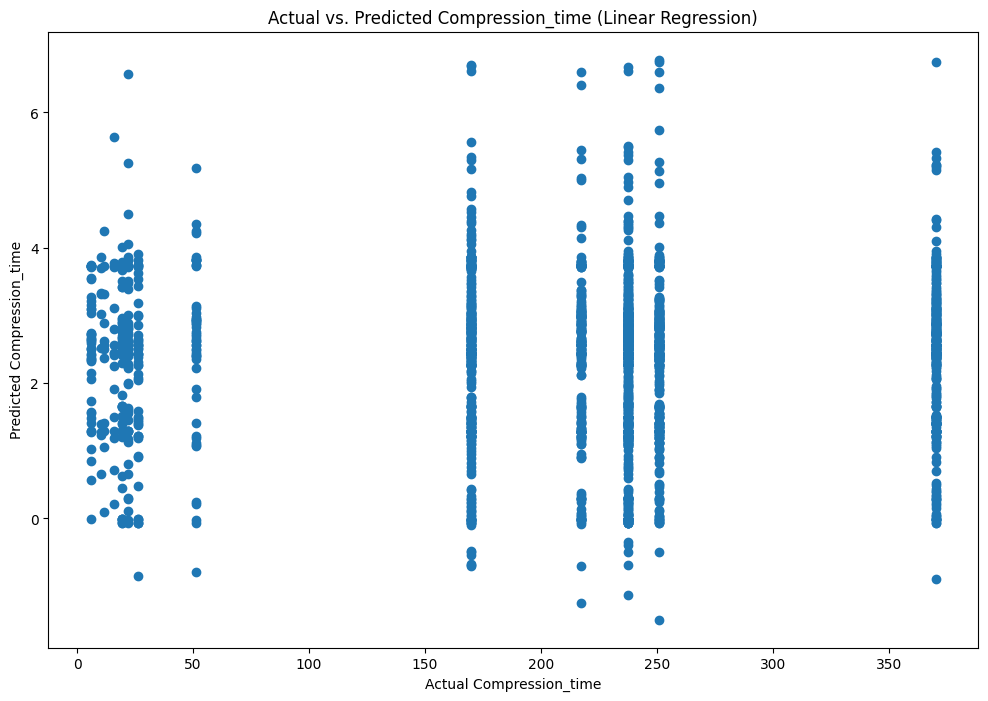

In [10]:
# take all the data, and try to find something

# Extract every features
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"]]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # 9 input features (Res_Freq, Amplitude, Phase, Sample_number, Peak, Before_compression, After_compression, Compression_ratio, Compression_time)
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the prediction (Compression_time)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data of the linear regression model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Compression_time")
plt.ylabel("Predicted Compression_time")
plt.title("Actual vs. Predicted Compression_time (Linear Regression)")
plt.show()




Cluster Centers (scaled values):
[[ 0.03590618 -0.95143187  1.46637782]
 [ 1.02589492  0.32259803 -0.39114455]
 [-1.08909118  1.08108606 -0.10606207]
 [ 0.07728616 -1.18689086 -0.58425329]]


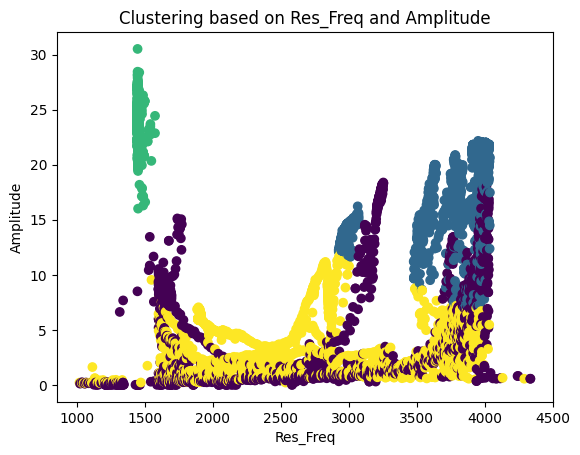

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have the reload_df() function to load the data into df
df = reload_df()

# Select the features for clustering
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
data_for_clustering = df[selected_features]

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters (k) - you can experiment with different values
k = 4

# Create the KMeans instance and fit the scaled data
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels back to the DataFrame
df['Cluster'] = labels

# Print cluster centers (scaled values) - you can inverse_transform to get the original scale
print("Cluster Centers (scaled values):")
print(cluster_centers)

# Plot the clusters on a scatter plot (choose two features for visualization)
feature1, feature2 = selected_features[:2]  # You can choose any two features to visualize
plt.scatter(df[feature1], df[feature2], c=labels, cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Clustering based on {} and {}".format(feature1, feature2))
plt.show()

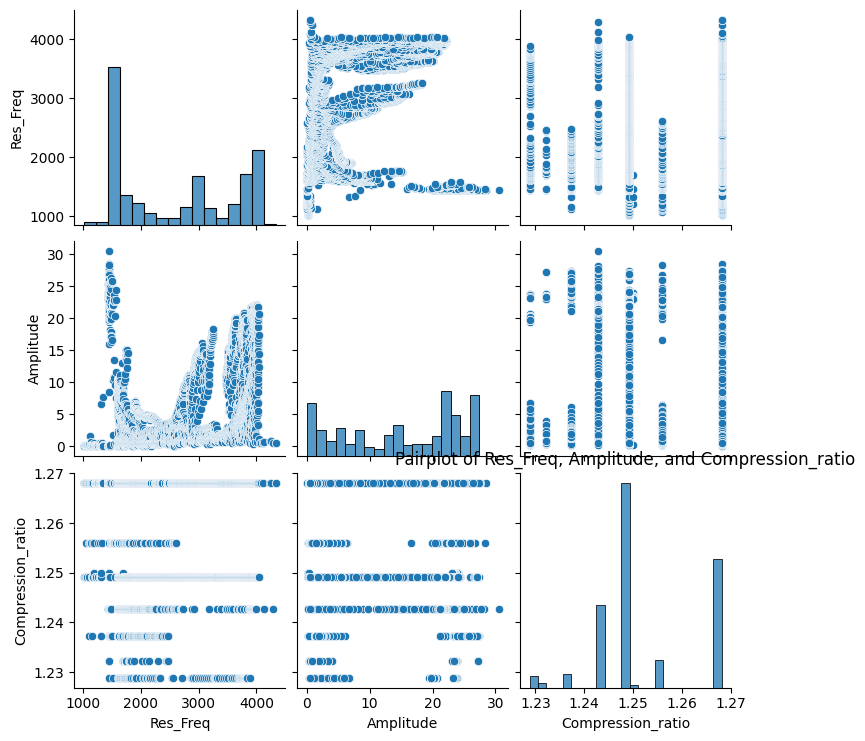

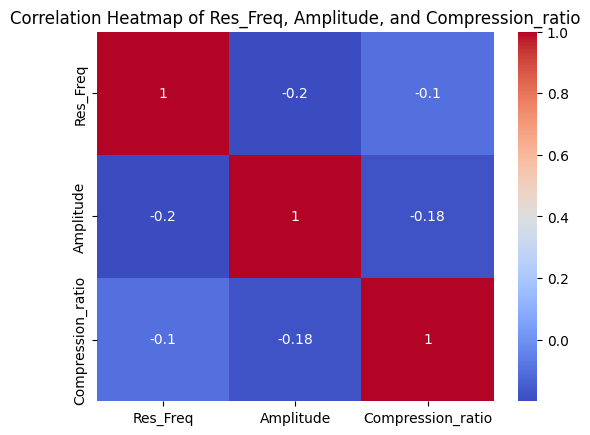

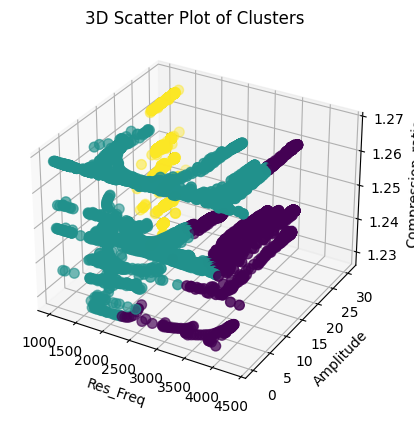

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
# And you have selected the relevant features for analysis
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
data_for_analysis = df[selected_features]

# Pairplot to visualize relationships between the selected features
sns.pairplot(data_for_analysis)
plt.title("Pairplot of Res_Freq, Amplitude, and Compression_ratio")
plt.show()

# Heatmap to visualize correlations between the selected features
correlation_matrix = data_for_analysis.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Res_Freq, Amplitude, and Compression_ratio")
plt.show()

# K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_analysis)

# Choose the number of clusters (k) - you can experiment with different values
k = 3

# Create the KMeans instance and fit the scaled data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels back to the DataFrame
df['Cluster'] = labels

# Plot the clusters on a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Res_Freq"], df["Amplitude"], df["Compression_ratio"], c=labels, cmap='viridis', s=50)
ax.set_xlabel("Res_Freq")
ax.set_ylabel("Amplitude")
ax.set_zlabel("Compression_ratio")
ax.set_title("3D Scatter Plot of Clusters")
plt.show()

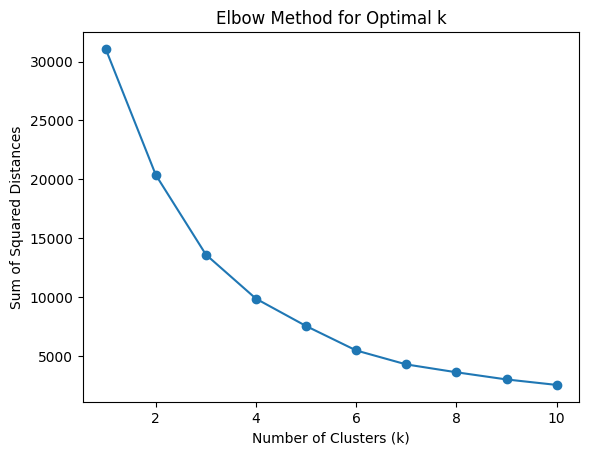

In [13]:
# Elbow method to find the optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

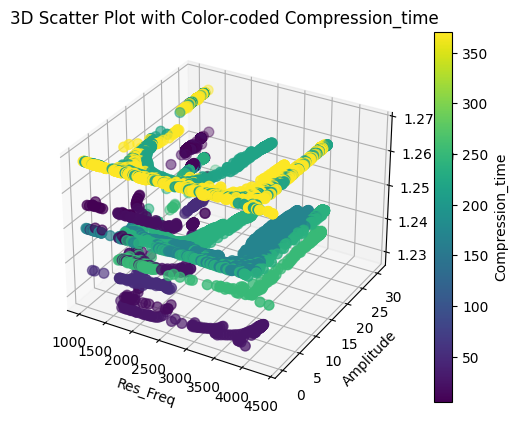

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
data_for_analysis = df[selected_features]
compression_time = df["Compression_time"]

# Plot a 3D scatter plot with color-coded data points based on "Compression_time"
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_for_analysis["Res_Freq"], data_for_analysis["Amplitude"], data_for_analysis["Compression_ratio"], c=compression_time, cmap='viridis', s=50)
ax.set_xlabel("Res_Freq")
ax.set_ylabel("Amplitude")
ax.set_zlabel("Compression_ratio")
ax.set_title("3D Scatter Plot with Color-coded Compression_time")
plt.colorbar(scatter, label="Compression_time")
plt.show()

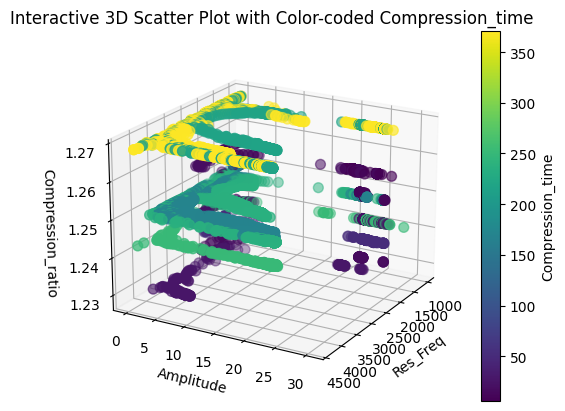

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
data_for_analysis = df[selected_features]
compression_time = df["Compression_time"]

# Plot a 3D scatter plot with color-coded data points based on "Compression_time"
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_for_analysis["Res_Freq"], data_for_analysis["Amplitude"], data_for_analysis["Compression_ratio"], c=compression_time, cmap='viridis', s=50)
ax.set_xlabel("Res_Freq")
ax.set_ylabel("Amplitude")
ax.set_zlabel("Compression_ratio")
ax.set_title("Interactive 3D Scatter Plot with Color-coded Compression_time")
plt.colorbar(scatter, label="Compression_time")

# Enable 3D rotation
ax.view_init(elev=20, azim=30)

plt.show()

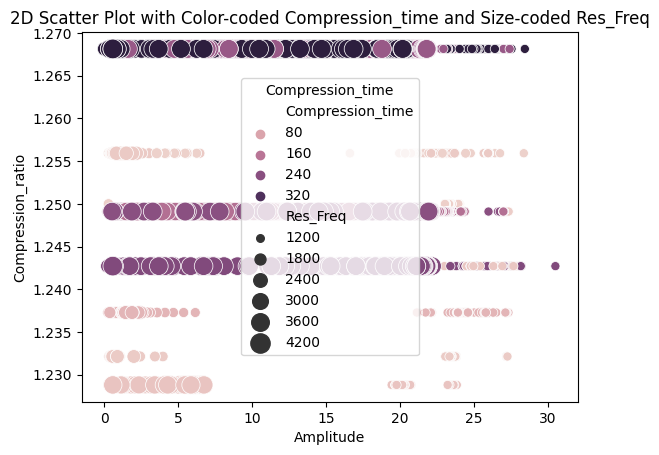

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Amplitude", "Compression_ratio", "Compression_time"]
data_for_analysis = df[selected_features]
res_freq = df["Res_Freq"]

# Create a 2D scatter plot with color-coded markers based on "Res_Freq"
sns.scatterplot(x="Amplitude", y="Compression_ratio", hue="Compression_time", size=res_freq, sizes=(20, 200), data=df)
plt.xlabel("Amplitude")
plt.ylabel("Compression_ratio")
plt.title("2D Scatter Plot with Color-coded Compression_time and Size-coded Res_Freq")
plt.legend(title="Compression_time")
plt.show()

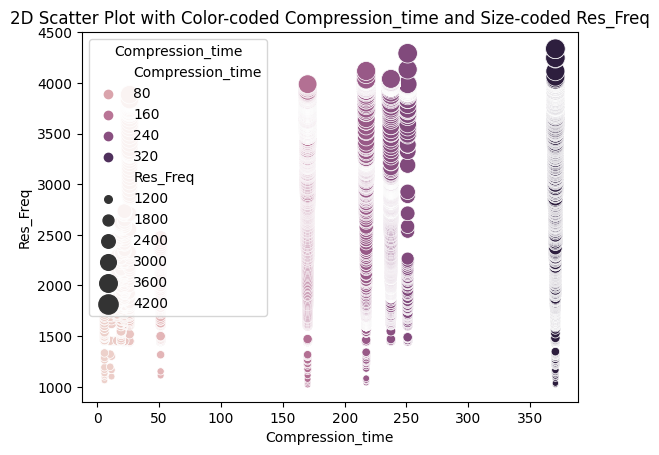

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Amplitude", "Compression_ratio", "Compression_time", "Res_Freq"]

# Randomly select two features for visualization
x_feature, y_feature = random.sample(selected_features, 2)

# Create a 2D scatter plot with color-coded markers
sns.scatterplot(x=x_feature, y=y_feature, hue="Compression_time", size="Res_Freq", sizes=(20, 200), data=df)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"2D Scatter Plot with Color-coded Compression_time and Size-coded Res_Freq")
plt.legend(title="Compression_time")
plt.show()

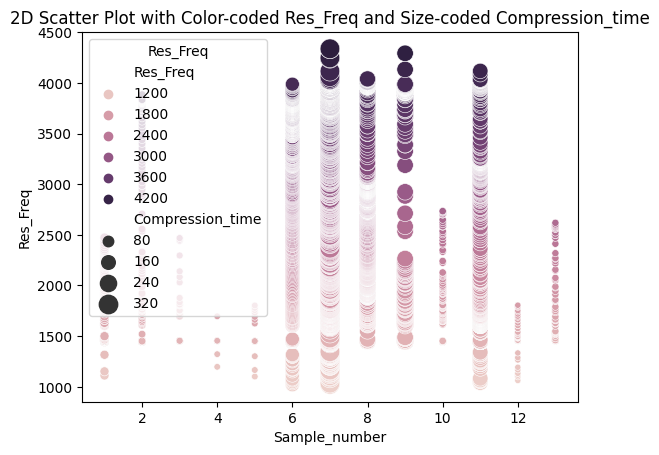

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Amplitude", "Compression_ratio", "Res_Freq", "Sample_number"]

# Randomly select two features for visualization
x_feature, y_feature = random.sample(selected_features, 2)

# Create a 2D scatter plot with color-coded markers
sns.scatterplot(x=x_feature, y=y_feature, hue="Res_Freq", size="Compression_time", sizes=(20, 200), data=df)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"2D Scatter Plot with Color-coded Res_Freq and Size-coded Compression_time")
plt.legend(title="Res_Freq")
plt.show()


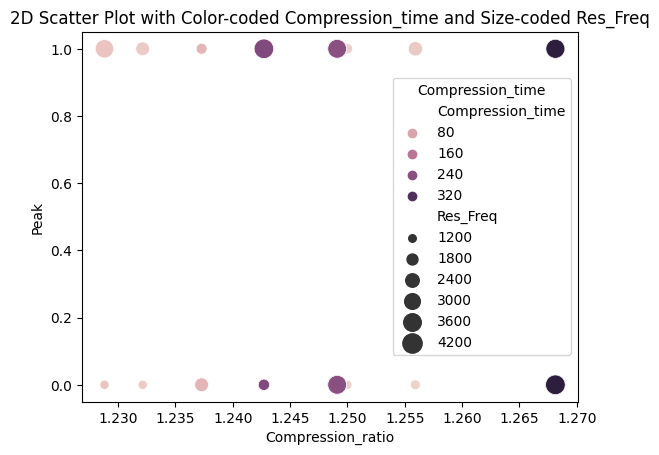

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio", "Peak"]

# Randomly select two features for visualization
x_feature, y_feature = random.sample(selected_features, 2)

# Create a 2D scatter plot with color-coded markers
sns.scatterplot(x=x_feature, y=y_feature, hue="Compression_time", size="Res_Freq", sizes=(20, 200), data=df)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"2D Scatter Plot with Color-coded Compression_time and Size-coded Res_Freq")
plt.legend(title="Compression_time")
plt.show()


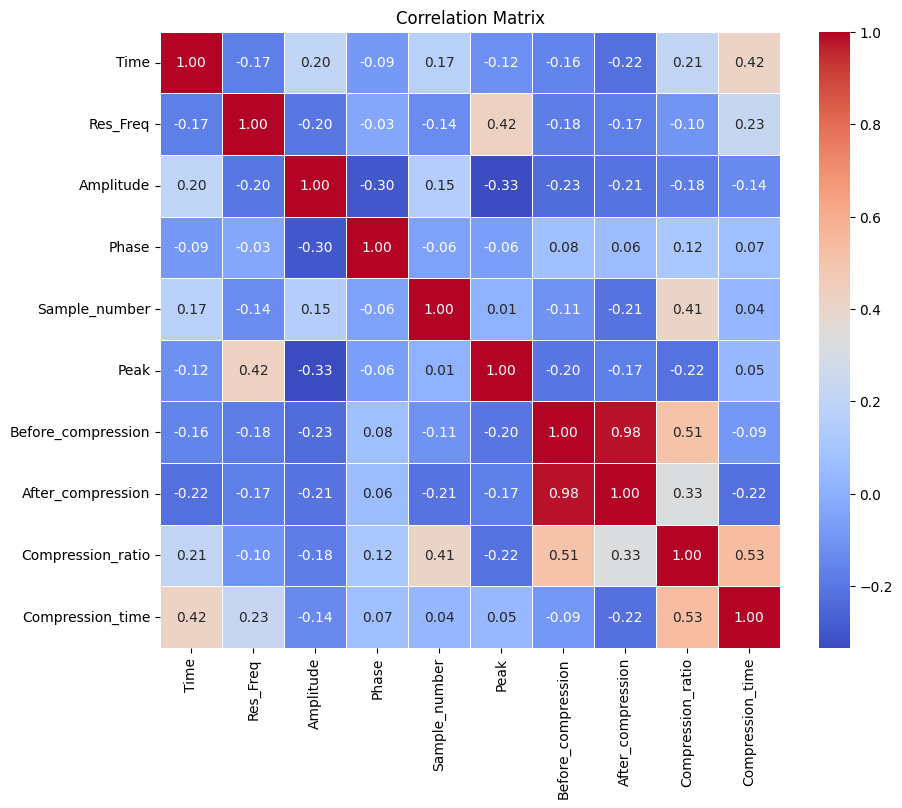

In [20]:
import pandas as pd

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"]
data_for_correlation = df[selected_parameters]

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\1375717895.py:16: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  mean_correlation_matrix = correlation_matrices.mean(level=1)


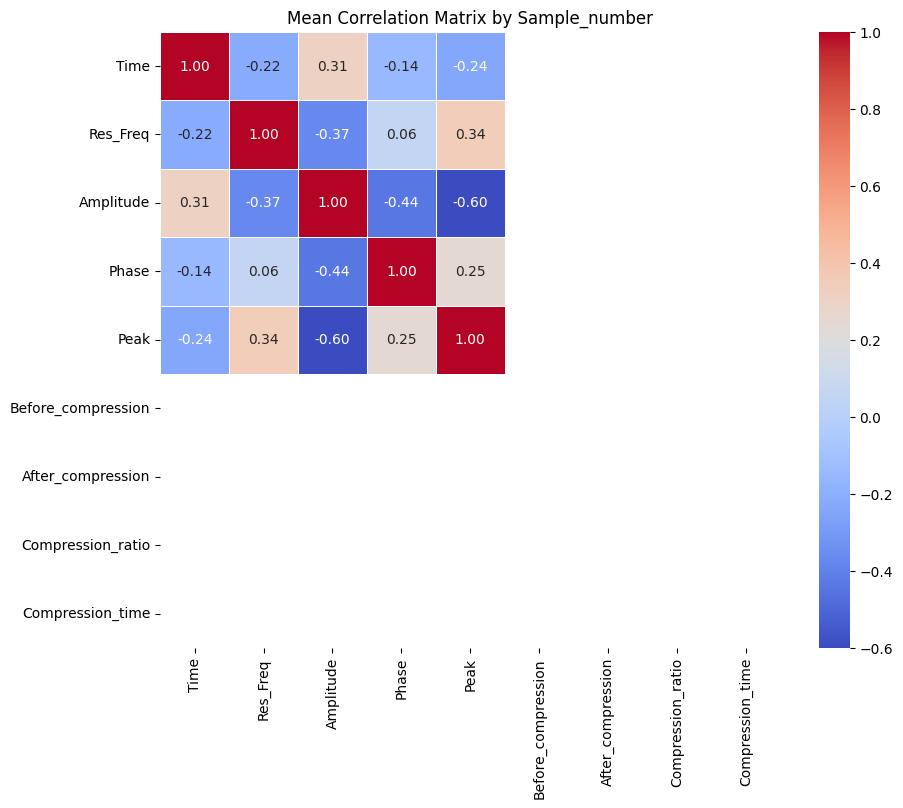

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"]
data_for_correlation = df[selected_parameters]

# Group data by "Sample_number"
grouped_data = data_for_correlation.groupby("Sample_number")

# Calculate the correlation matrix for each group
correlation_matrices = grouped_data.corr()

# Calculate the mean correlation matrix across all groups
mean_correlation_matrix = correlation_matrices.mean(level=1)

# Create a heatmap for the mean correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mean Correlation Matrix by Sample_number")
plt.show()


C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\990810332.py:16: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  mean_correlation_matrix = correlation_matrices.mean(level=1)


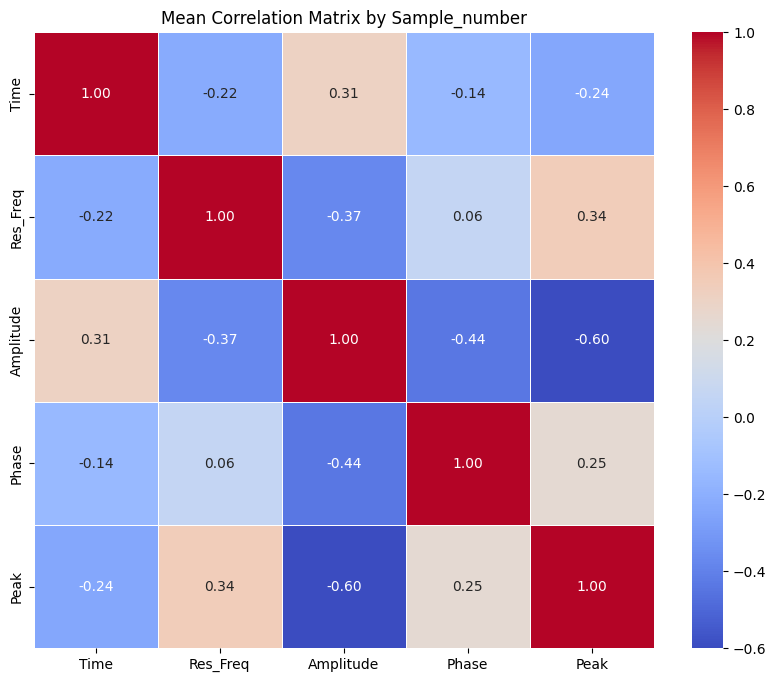

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak"]
data_for_correlation = df[selected_parameters]

# Group data by "Sample_number"
grouped_data = data_for_correlation.groupby("Sample_number")

# Calculate the correlation matrix for each group
correlation_matrices = grouped_data.corr(min_periods=1)

# Calculate the mean correlation matrix across all groups
mean_correlation_matrix = correlation_matrices.mean(level=1)

# Create a heatmap for the mean correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mean Correlation Matrix by Sample_number")
plt.show()


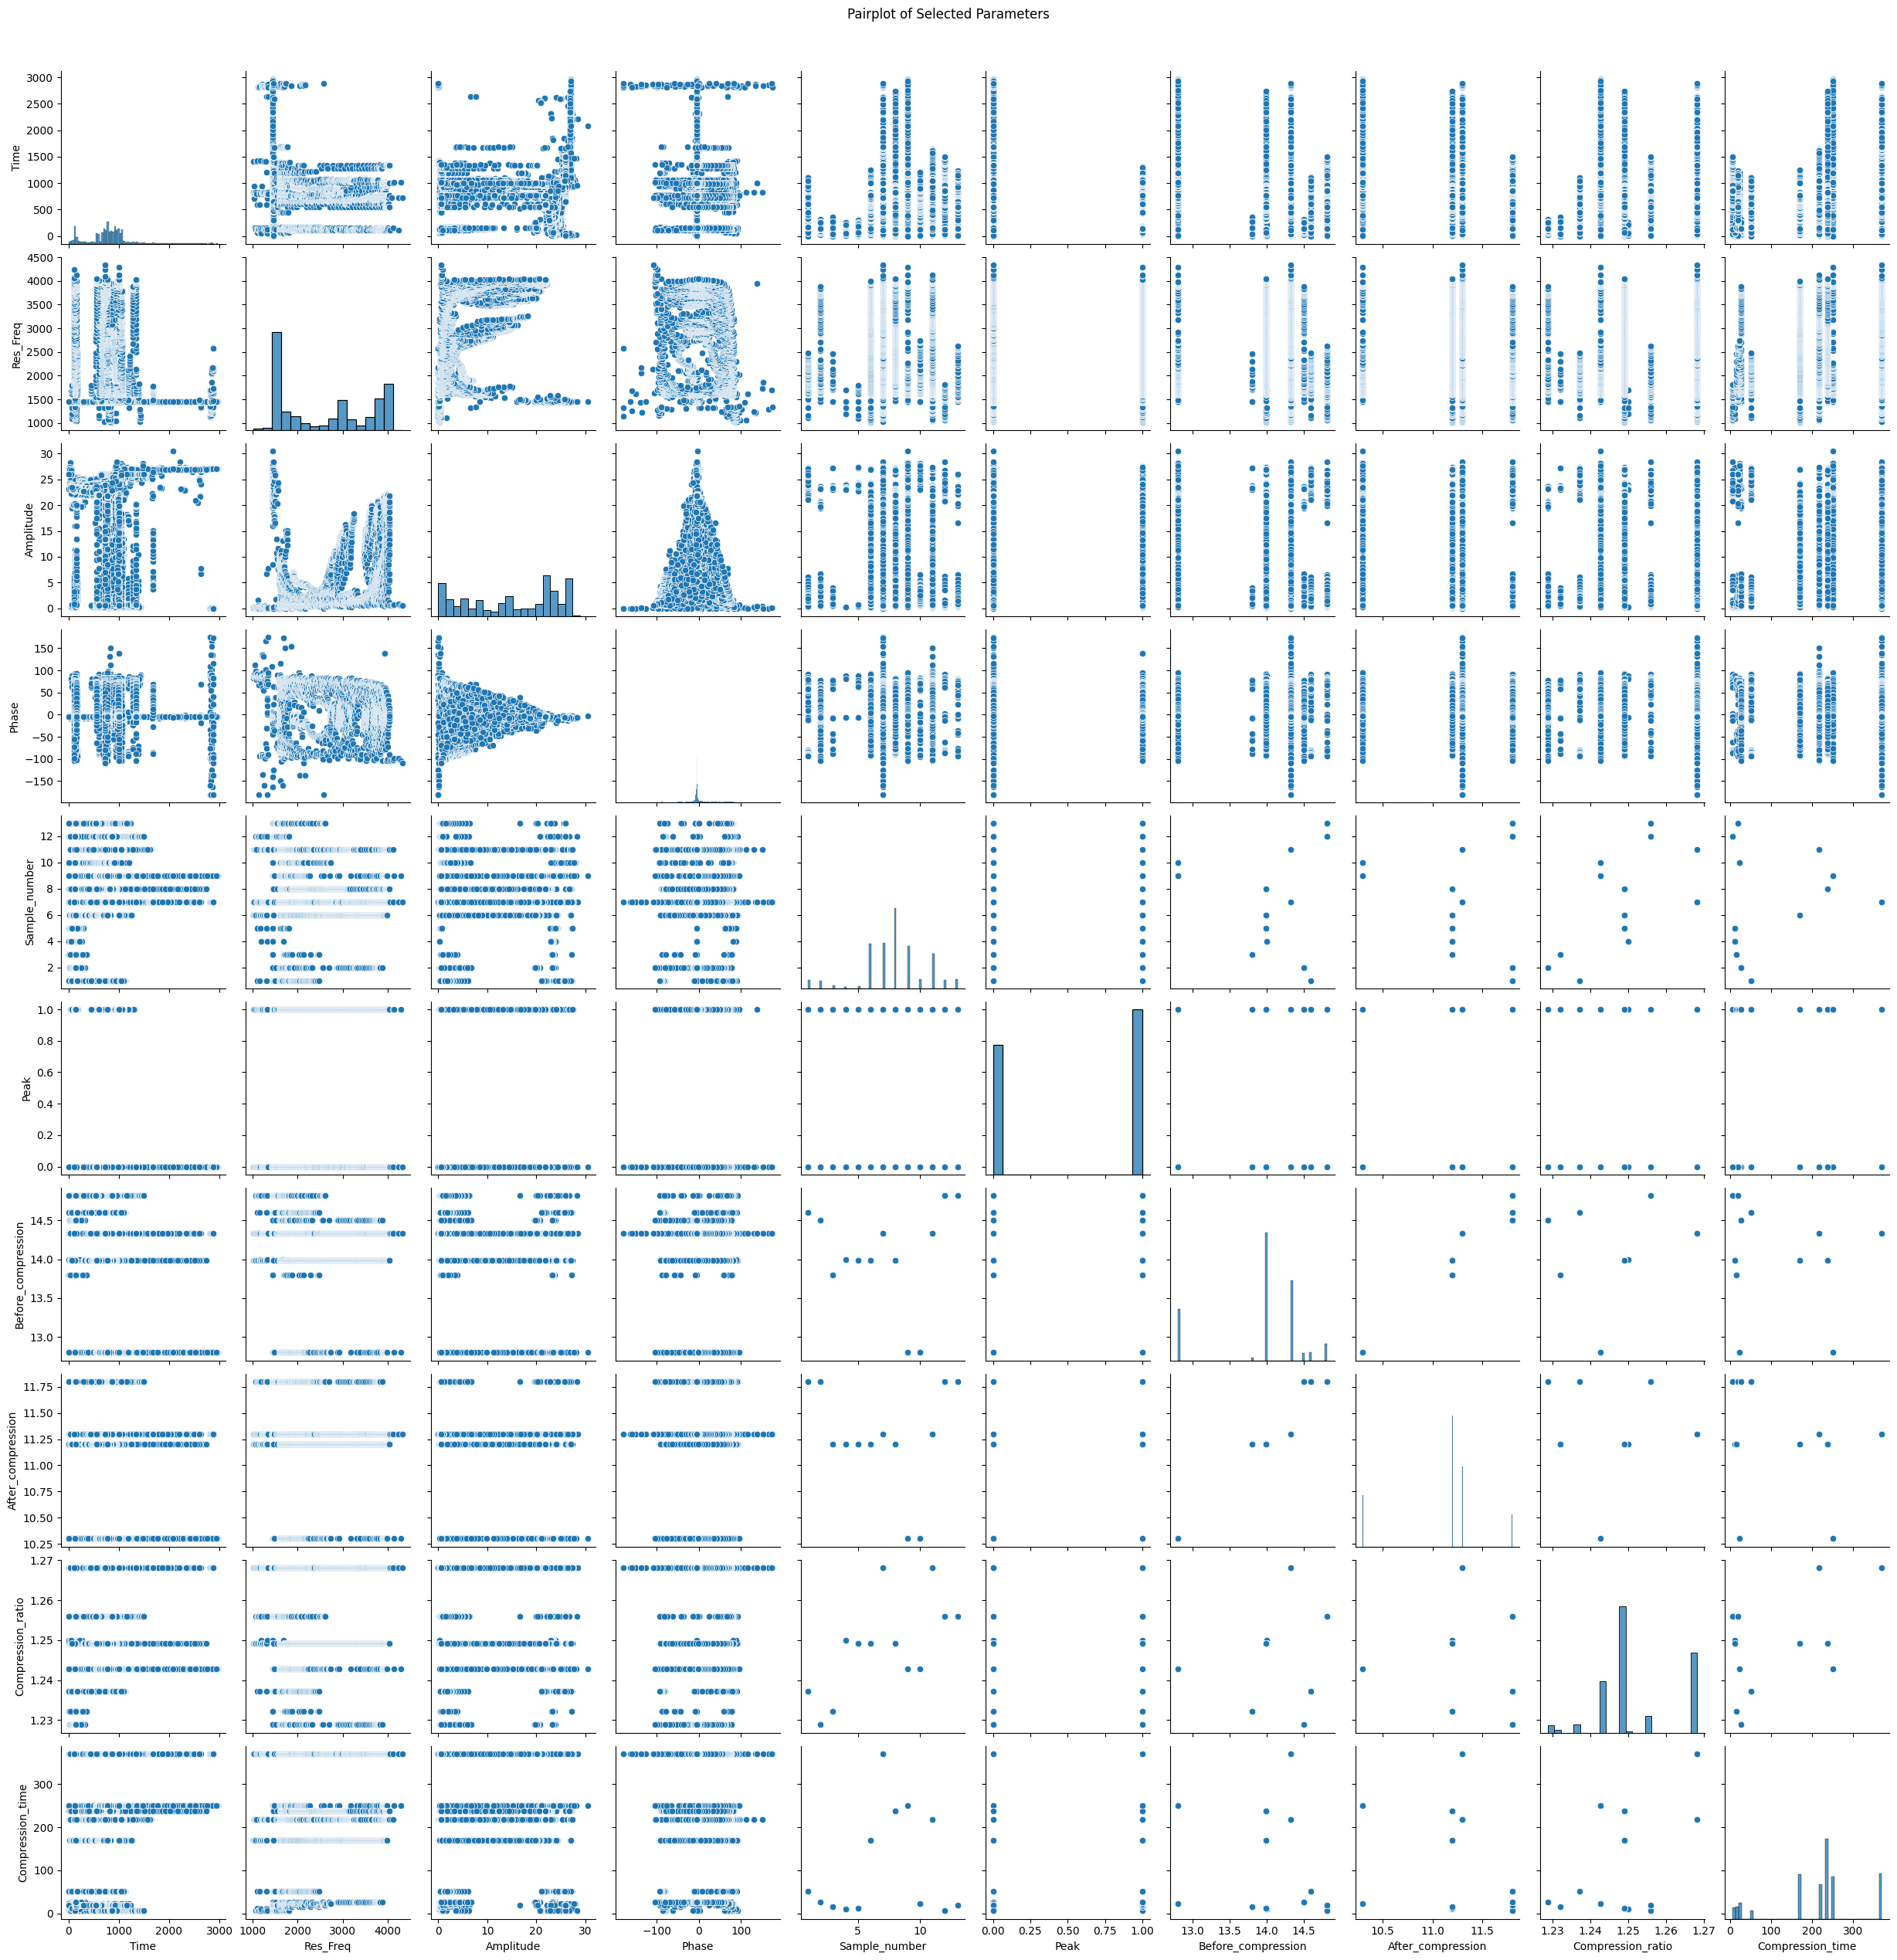

In [23]:
import seaborn as sns

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"]
data_for_visualization = df[selected_parameters]

# Create a pairplot
sns.pairplot(data_for_visualization)
plt.suptitle("Pairplot of Selected Parameters", y=1.02)
plt.show()


In [24]:
# Generate a statistical summary
summary = data_for_visualization.describe()
print("Statistical Summary:")
print(summary)


Statistical Summary:
               Time      Res_Freq     Amplitude         Phase  Sample_number  \
count  10360.000000  10360.000000  10360.000000  10360.000000   10360.000000   
mean     861.711723   2574.295273     15.000814      1.114918       7.926641   
std      525.219254   1032.596665      9.186764     31.671641       2.430306   
min        0.950055   1018.846491      0.000000   -180.000000       1.000000   
25%      605.525635   1452.598081      5.982000     -6.212500       7.000000   
50%      817.900282   2611.177790     16.378000     -4.990000       8.000000   
75%     1004.362947   3761.793957     23.106000      0.280000       9.000000   
max     2971.599966   4336.678654     30.520000    175.030000      13.000000   

               Peak  Before_compression  After_compression  Compression_ratio  \
count  10360.000000        10360.000000       10360.000000       10360.000000   
mean       0.559170           13.950967          11.136795           1.252559   
std        0.49

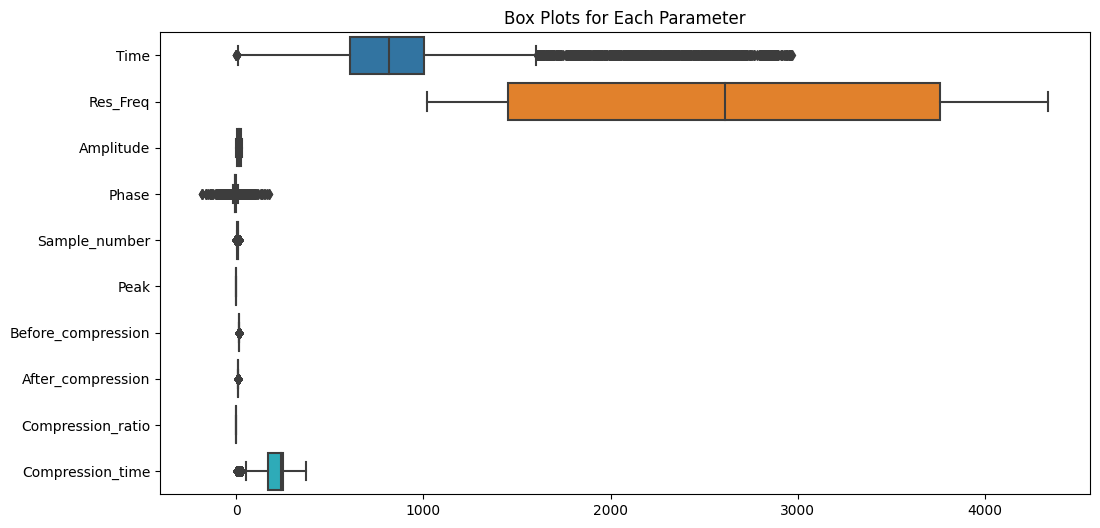

In [25]:
# Create box plots for each parameter
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_for_visualization, orient="h")
plt.title("Box Plots for Each Parameter")
plt.show()


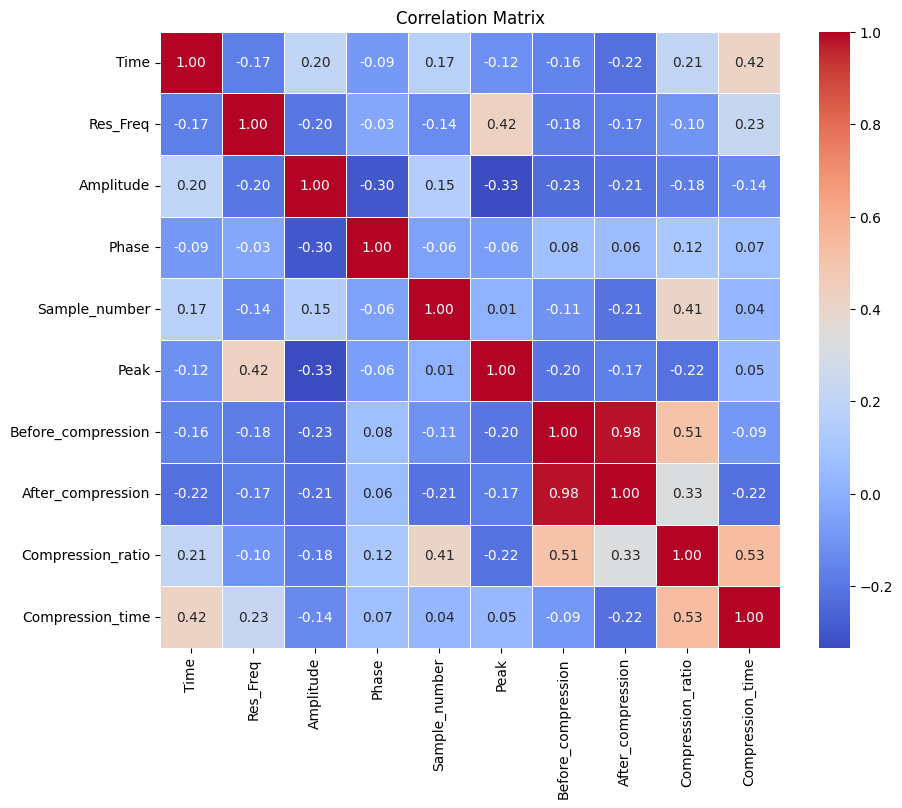

In [26]:
# Calculate the correlation matrix
correlation_matrix = data_for_visualization.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


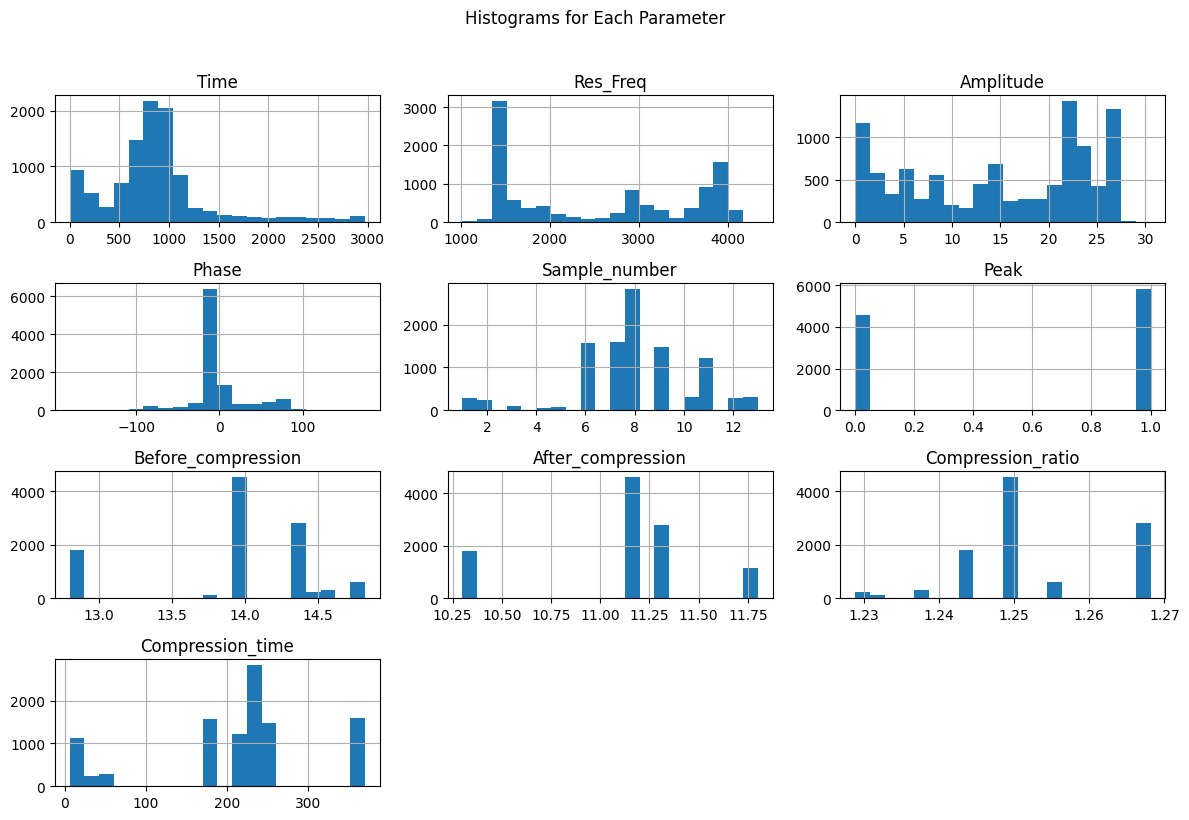

In [27]:
# Create histograms for each parameter
data_for_visualization.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms for Each Parameter", y=1.02)
plt.tight_layout()
plt.show()


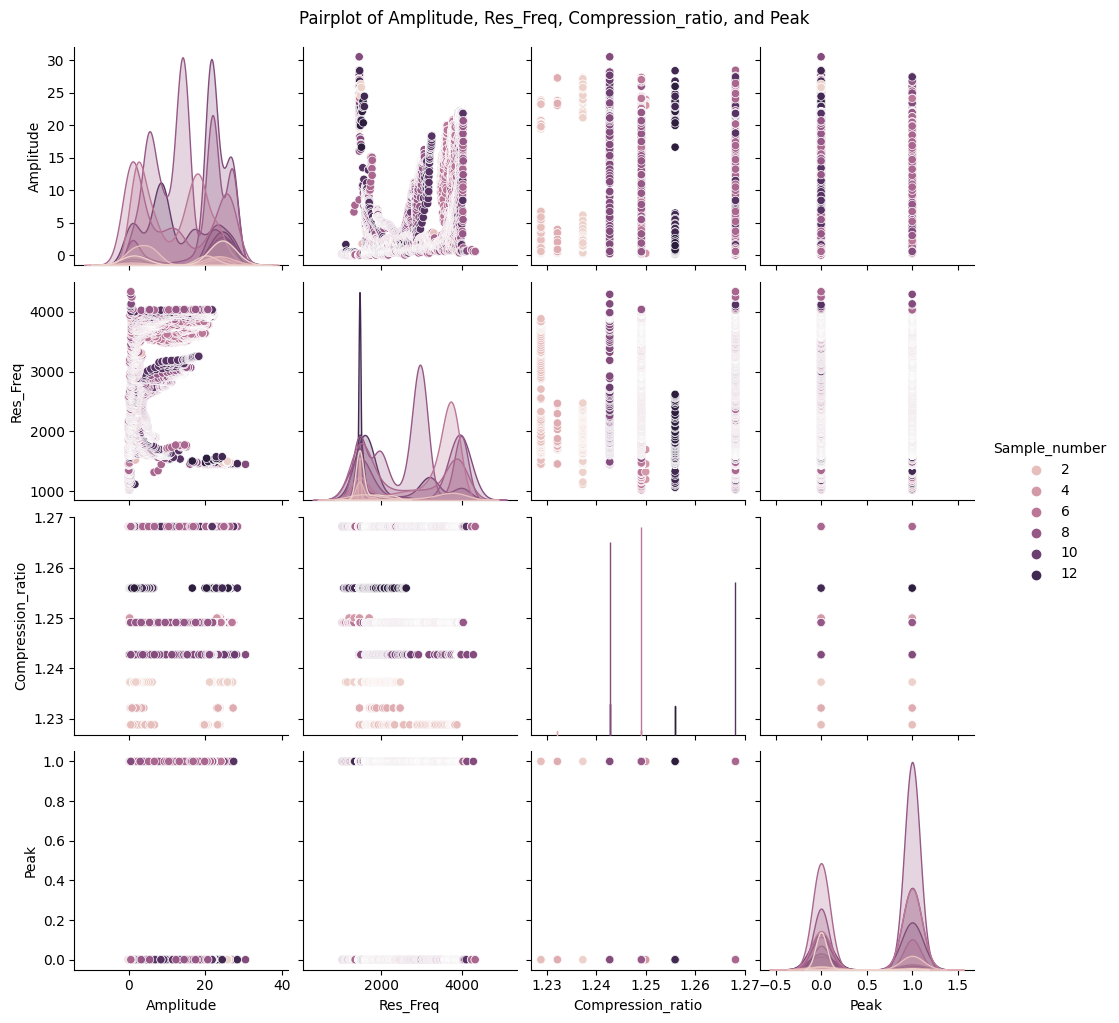

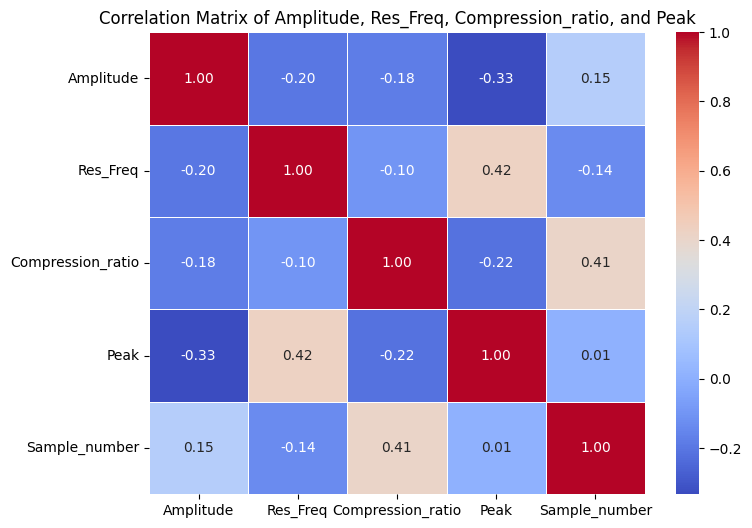

In [28]:
# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak", "Sample_number"]
data_for_ml = df[selected_parameters].dropna()  # Removing rows with missing values


# Create a pairplot
sns.pairplot(data_for_ml, hue='Sample_number')
plt.suptitle("Pairplot of Amplitude, Res_Freq, Compression_ratio, and Peak", y=1.02)
plt.show()

# Calculate the correlation matrix
correlation_matrix = data_for_ml.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Amplitude, Res_Freq, Compression_ratio, and Peak")
plt.show()


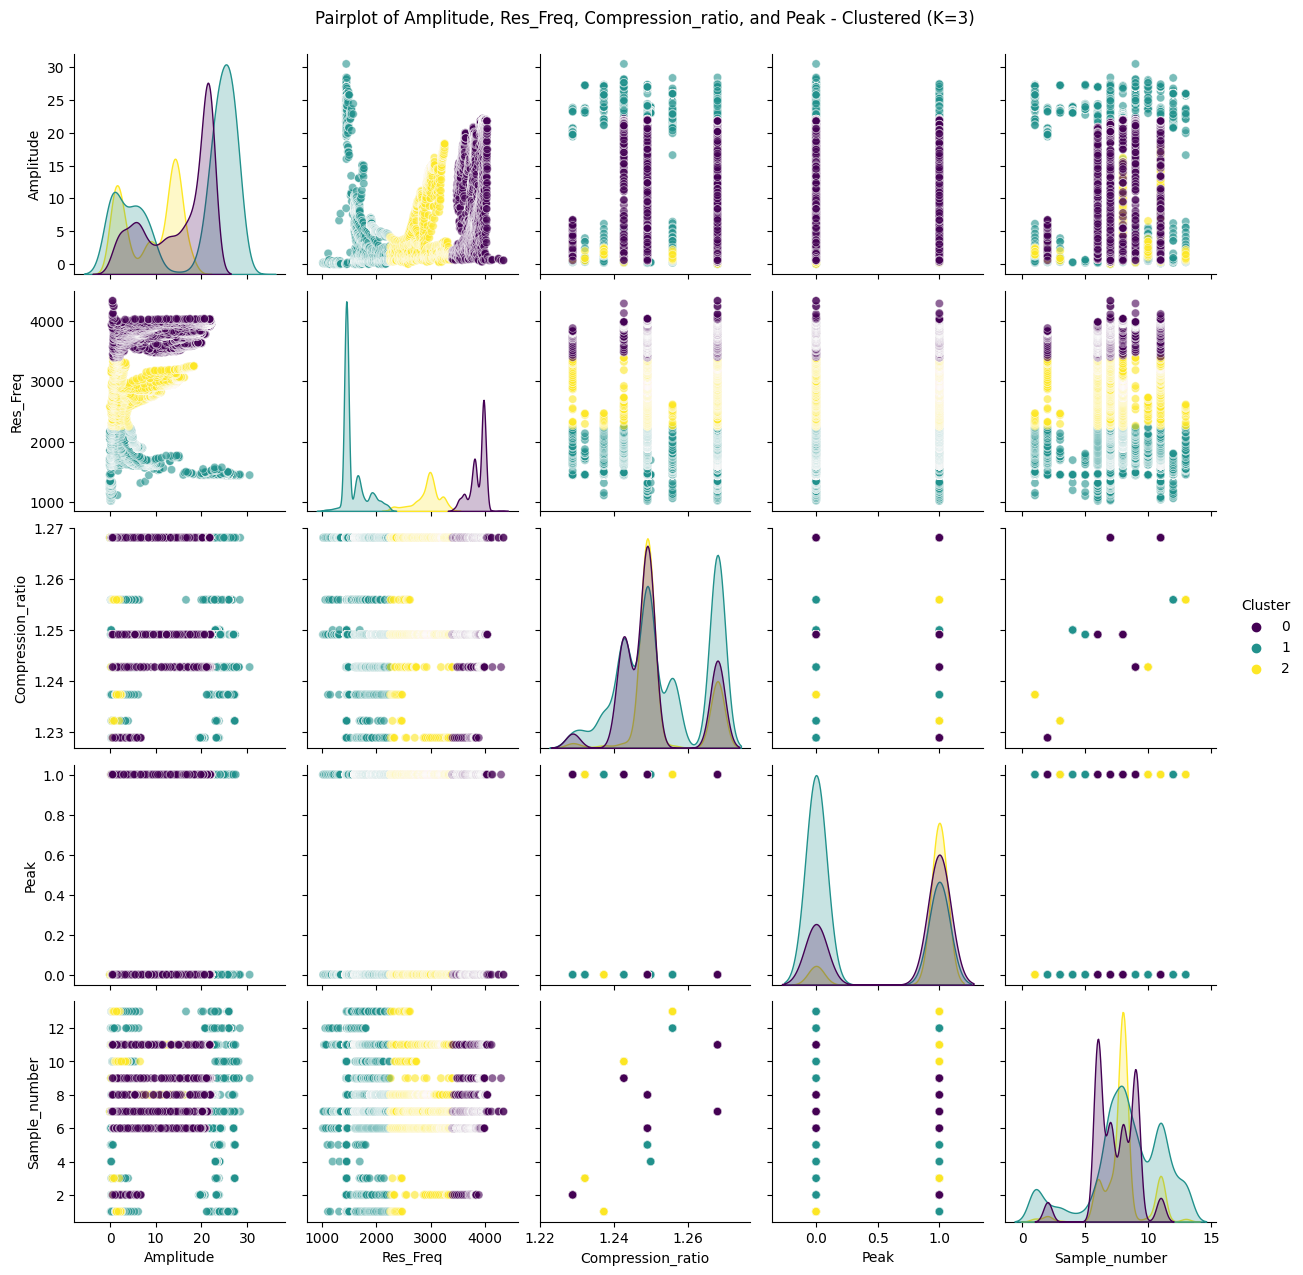

In [29]:
from sklearn.cluster import KMeans

# Extract features for clustering
X = data_for_ml[["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]]

# Choose the number of clusters (you can adjust this based on your requirements)
num_clusters = 3

# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X)

# Add cluster labels to the DataFrame
data_for_ml["Cluster"] = kmeans_model.labels_

# Visualize the clusters using a pairplot colored by clusters
sns.pairplot(data_for_ml, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.6})
plt.suptitle(f"Pairplot of Amplitude, Res_Freq, Compression_ratio, and Peak - Clustered (K={num_clusters})", y=1.02)
plt.show()


C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\1850436088.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_correlation["Amplitude_Res_Freq"] = data_for_correlation["Amplitude"] * data_for_correlation["Res_Freq"]
C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\1850436088.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_correlation["Amplitude_Compression_ratio"] = data_for_correlation["Amplitude"] * data_for_correlation["Compression_ratio"]
C:\Users\maxim\AppData\Local\Temp\ipykern

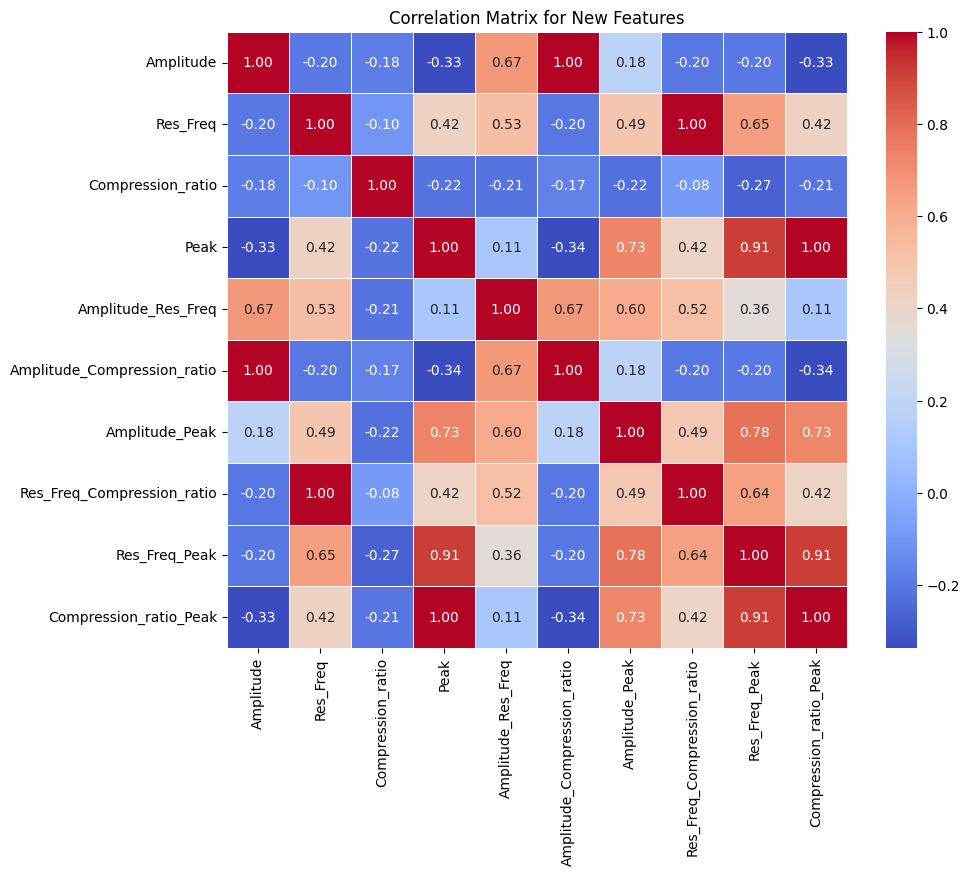

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]
data_for_correlation = df[selected_parameters]

# Create new features by multiplying pairs of parameters
data_for_correlation["Amplitude_Res_Freq"] = data_for_correlation["Amplitude"] * data_for_correlation["Res_Freq"]
data_for_correlation["Amplitude_Compression_ratio"] = data_for_correlation["Amplitude"] * data_for_correlation["Compression_ratio"]
data_for_correlation["Amplitude_Peak"] = data_for_correlation["Amplitude"] * data_for_correlation["Peak"]
data_for_correlation["Res_Freq_Compression_ratio"] = data_for_correlation["Res_Freq"] * data_for_correlation["Compression_ratio"]
data_for_correlation["Res_Freq_Peak"] = data_for_correlation["Res_Freq"] * data_for_correlation["Peak"]
data_for_correlation["Compression_ratio_Peak"] = data_for_correlation["Compression_ratio"] * data_for_correlation["Peak"]

# Calculate the correlation matrix for the new features
correlation_matrix = data_for_correlation.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for New Features")
plt.show()


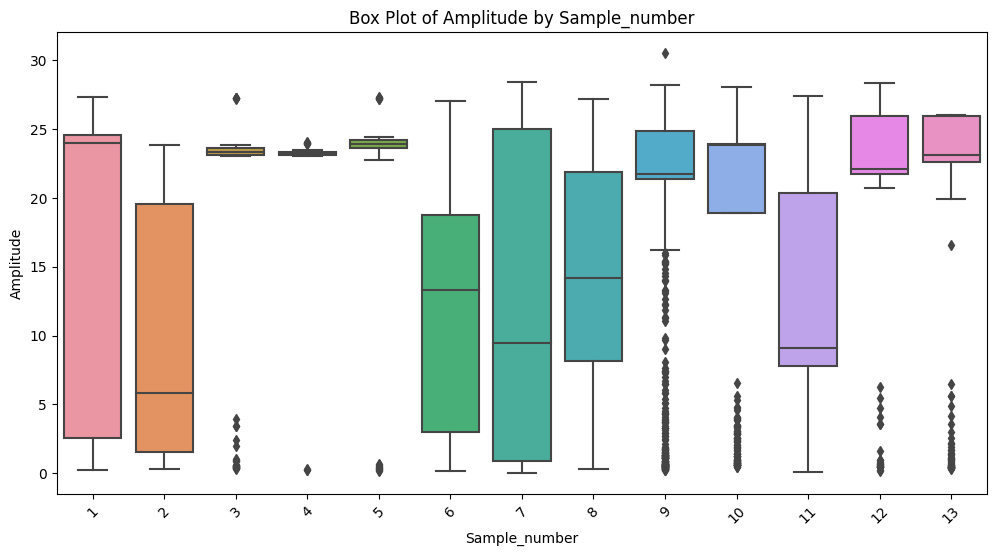

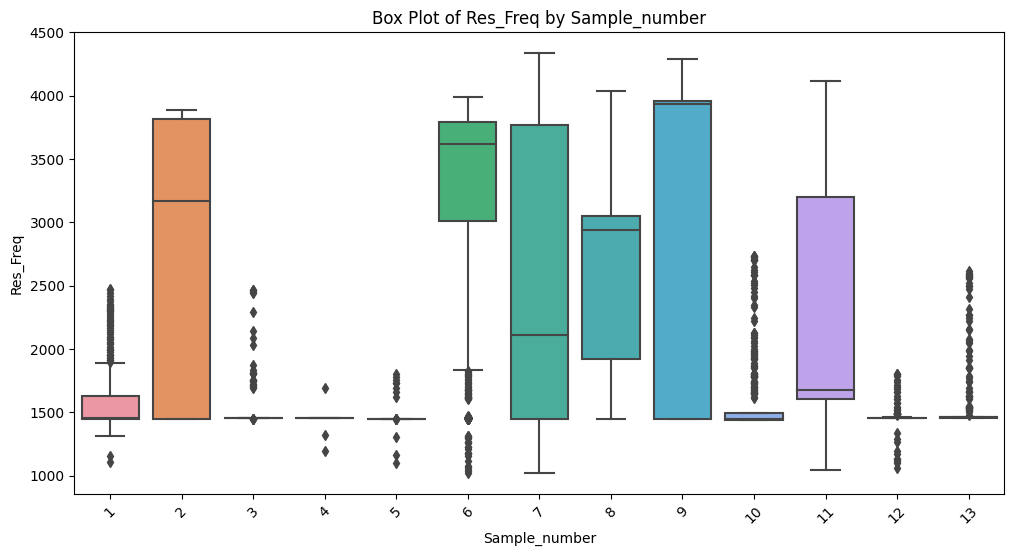

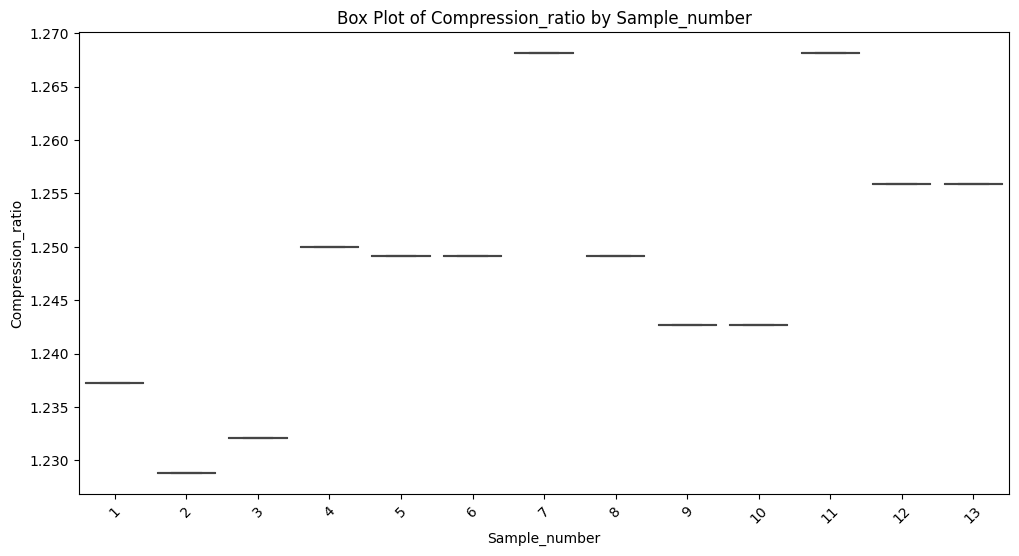

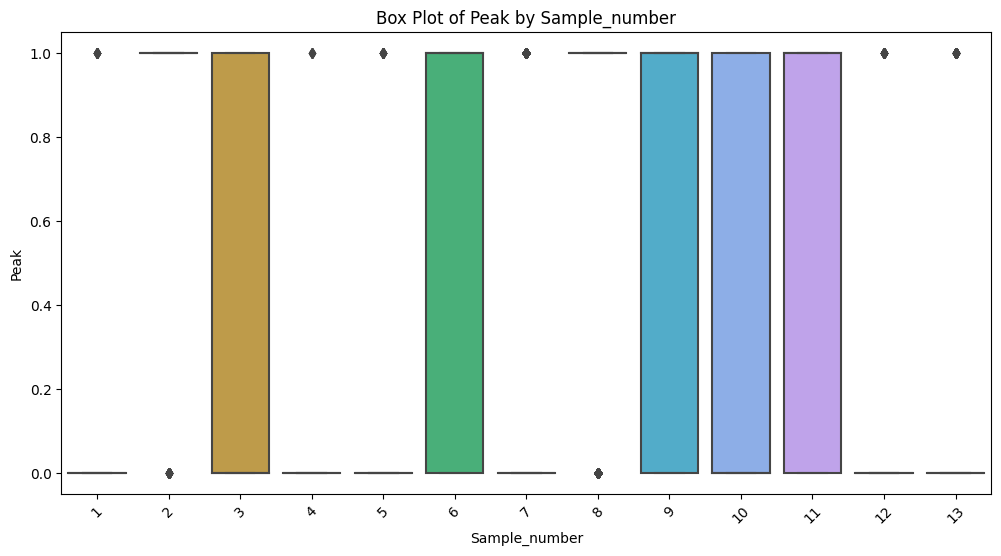

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak", "Sample_number"]
data_for_viz = df[selected_parameters].dropna()  # Removing rows with missing values

# Create box plots for each parameter grouped by Sample_number
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sample_number", y="Amplitude", data=data_for_viz)
plt.title("Box Plot of Amplitude by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sample_number", y="Res_Freq", data=data_for_viz)
plt.title("Box Plot of Res_Freq by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sample_number", y="Compression_ratio", data=data_for_viz)
plt.title("Box Plot of Compression_ratio by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sample_number", y="Peak", data=data_for_viz)
plt.title("Box Plot of Peak by Sample_number")
plt.xticks(rotation=45)
plt.show()


In [32]:
# Create swarm plots for each parameter grouped by Sample_number
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Sample_number", y="Amplitude", data=data_for_viz)
plt.title("Swarm Plot of Amplitude by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x="Sample_number", y="Res_Freq", data=data_for_viz)
plt.title("Swarm Plot of Res_Freq by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x="Sample_number", y="Compression_ratio", data=data_for_viz)
plt.title("Swarm Plot of Compression_ratio by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x="Sample_number", y="Peak", data=data_for_viz)
plt.title("Swarm Plot of Peak by Sample_number")
plt.xticks(rotation=45)
plt.show()


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

KeyboardInterrupt: 

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak", "Sample_number"]
data_for_anova = df[selected_parameters].dropna()  # Removing rows with missing values

# Perform ANOVA for each parameter
for param in ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]:
    formula = f"{param} ~ C(Sample_number) + C(Sample_number)"
    model = ols(formula, data=data_for_anova).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA for {param}:")
    print(anova_table)


ANOVA for Amplitude:
                         sum_sq       df           F  PR(>F)
C(Sample_number)  151106.594444     12.0  180.170339     0.0
Residual          723158.215724  10347.0         NaN     NaN
ANOVA for Res_Freq:
                        sum_sq       df           F  PR(>F)
C(Sample_number)  2.589673e+09     12.0  264.076727     0.0
Residual          8.455671e+09  10347.0         NaN     NaN
ANOVA for Compression_ratio:
                        sum_sq       df             F  PR(>F)
C(Sample_number)  1.169890e+00     12.0  2.182679e+27     0.0
Residual          4.621557e-25  10347.0           NaN     NaN
ANOVA for Peak:
                       sum_sq       df           F  PR(>F)
C(Sample_number)   621.427308     12.0  277.299211     0.0
Residual          1932.301553  10347.0         NaN     NaN


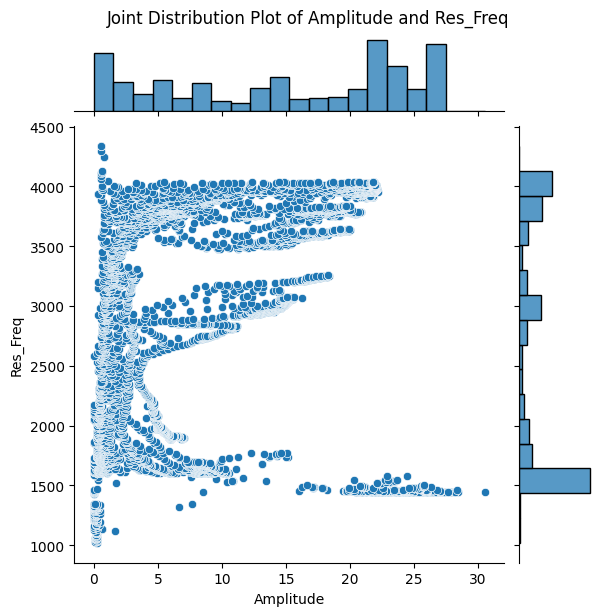

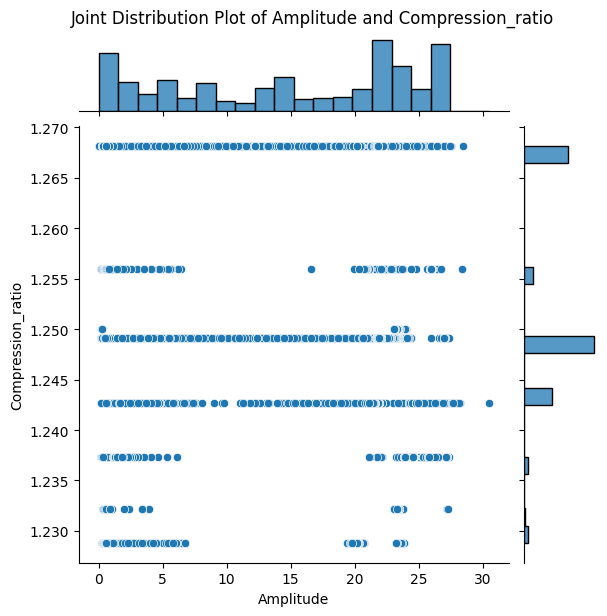

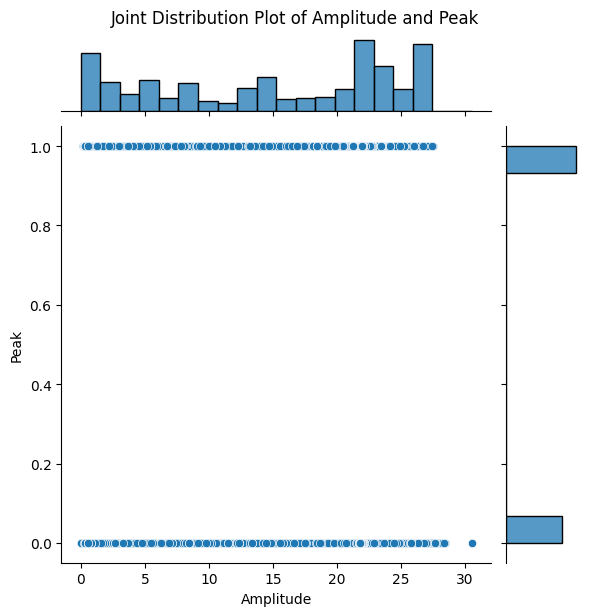

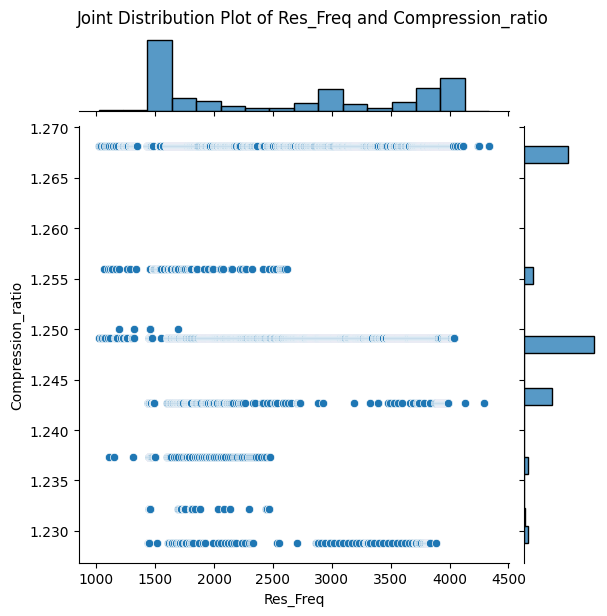

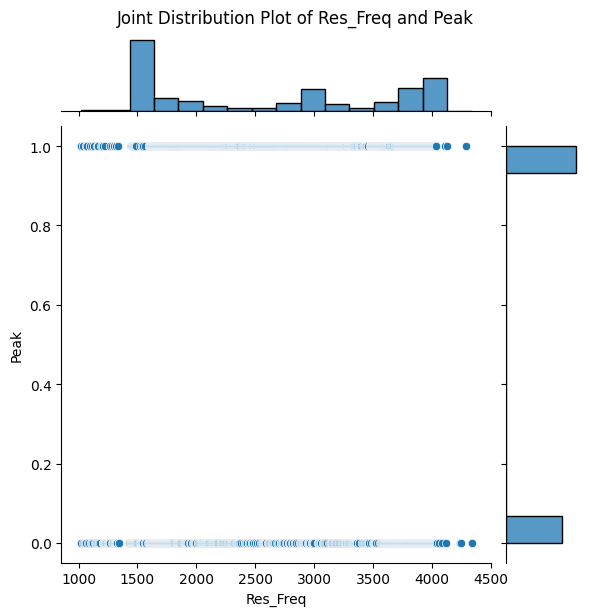

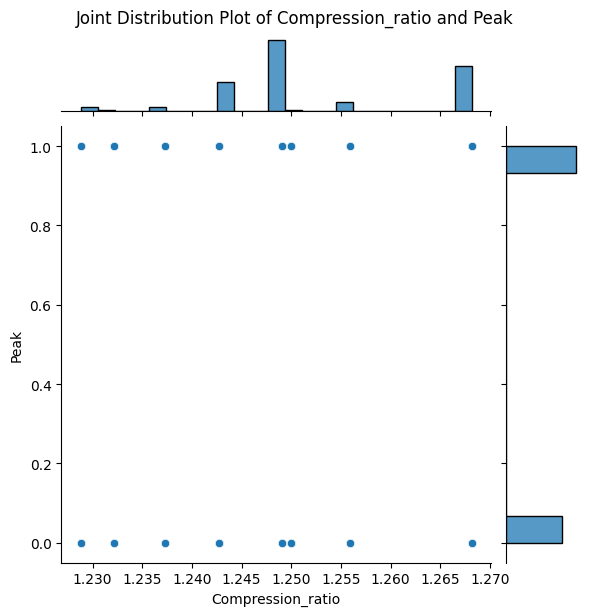

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]
data_for_visualization = df[selected_parameters].dropna()  # Removing rows with missing values

# Create joint distribution plots for each pair of parameters
sns.jointplot(x="Amplitude", y="Res_Freq", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Amplitude and Res_Freq", y=1.02)
plt.show()

sns.jointplot(x="Amplitude", y="Compression_ratio", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Amplitude and Compression_ratio", y=1.02)
plt.show()

sns.jointplot(x="Amplitude", y="Peak", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Amplitude and Peak", y=1.02)
plt.show()

sns.jointplot(x="Res_Freq", y="Compression_ratio", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Res_Freq and Compression_ratio", y=1.02)
plt.show()

sns.jointplot(x="Res_Freq", y="Peak", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Res_Freq and Peak", y=1.02)
plt.show()

sns.jointplot(x="Compression_ratio", y="Peak", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Compression_ratio and Peak", y=1.02)
plt.show()


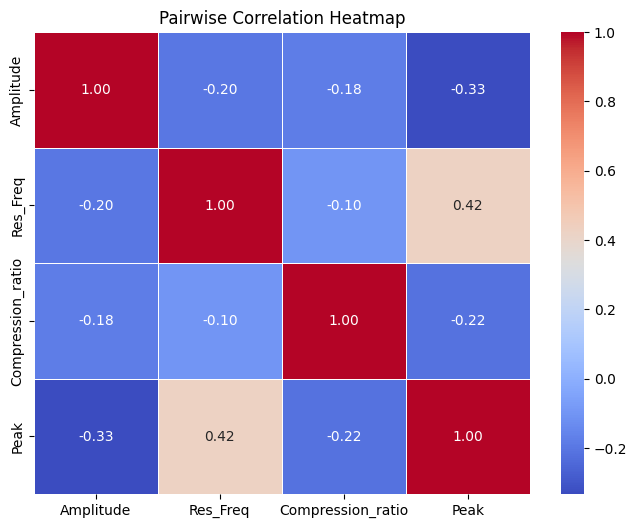

In [35]:
# Calculate the pairwise correlation matrix
pairwise_correlation_matrix = data_for_visualization.corr()

# Create a heatmap for the pairwise correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pairwise_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Pairwise Correlation Heatmap")
plt.show()


C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\2304792025.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_visualization["Amplitude"], label="Amplitude", shade=True)
C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\2304792025.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_visualization["Res_Freq"], label="Res_Freq", shade=True)
C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\2304792025.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_visualization["Compression_ratio"], label="Compression_ratio", shade=True)
C:\Users\maxim\AppData\Local\Temp\ipykernel_4216\2304792025

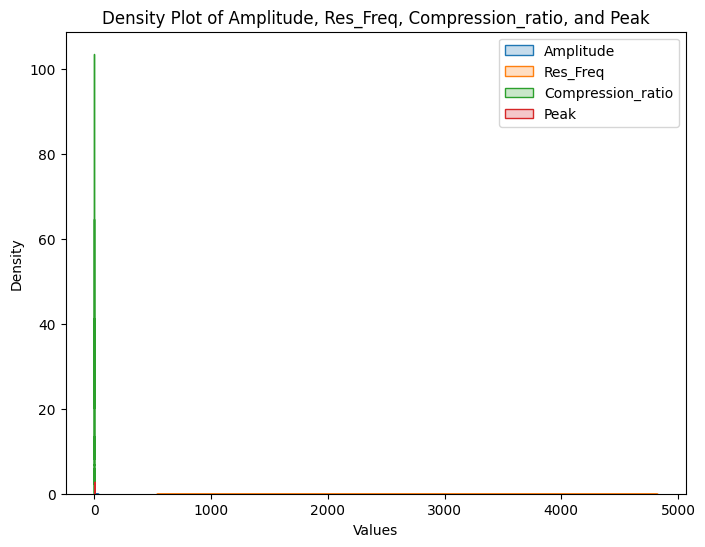

In [36]:
# Create density plots for each parameter
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data_for_visualization["Amplitude"], label="Amplitude", shade=True)
sns.kdeplot(data=data_for_visualization["Res_Freq"], label="Res_Freq", shade=True)
sns.kdeplot(data=data_for_visualization["Compression_ratio"], label="Compression_ratio", shade=True)
sns.kdeplot(data=data_for_visualization["Peak"], label="Peak", shade=True)
plt.title("Density Plot of Amplitude, Res_Freq, Compression_ratio, and Peak")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


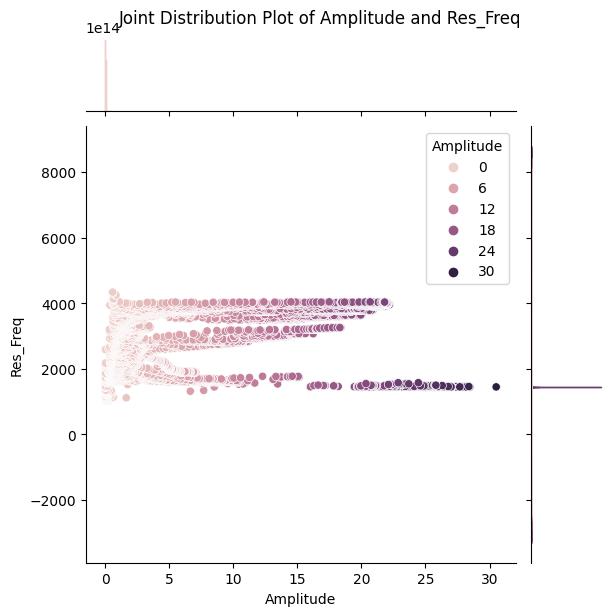

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


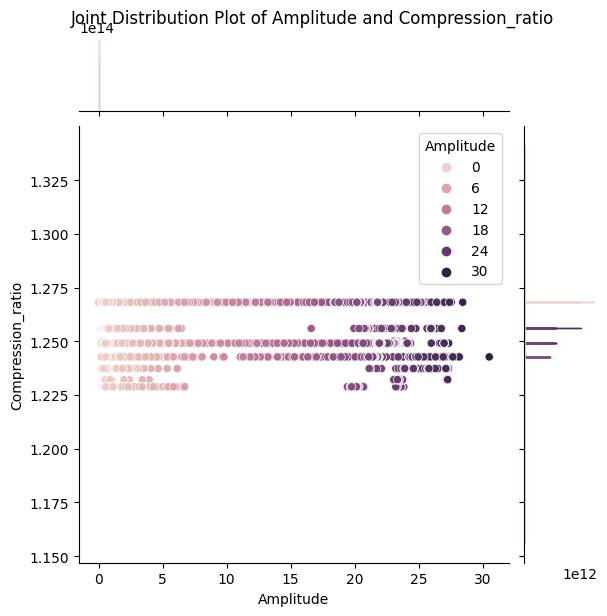

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


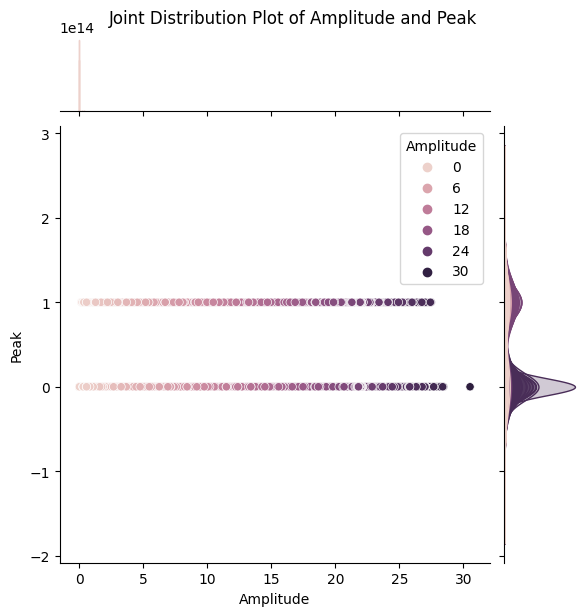

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


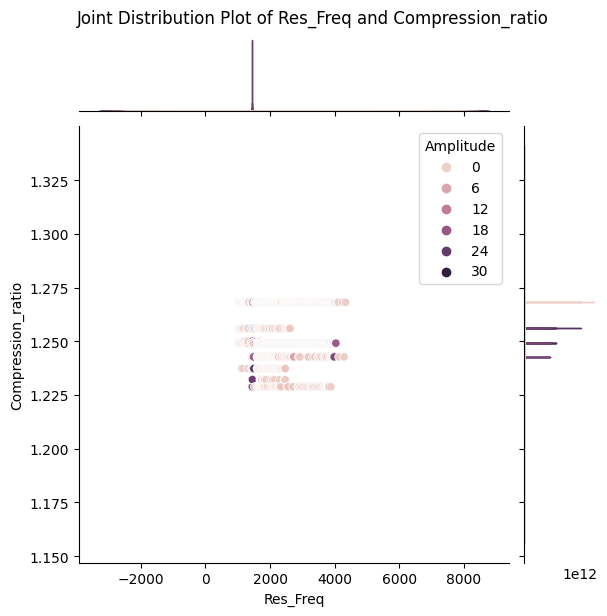

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


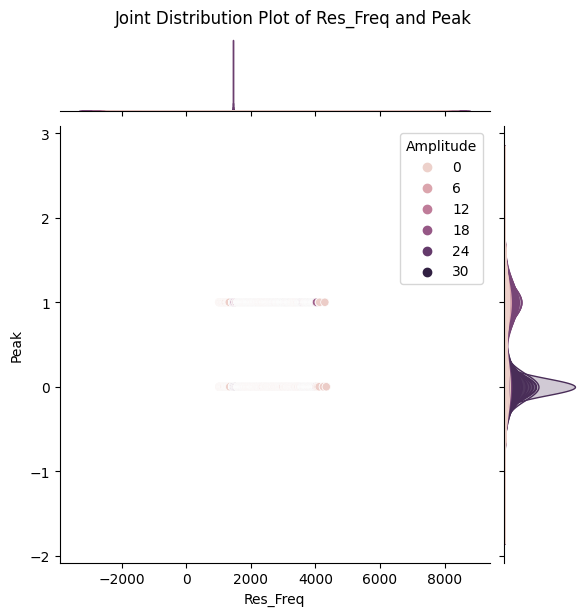

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


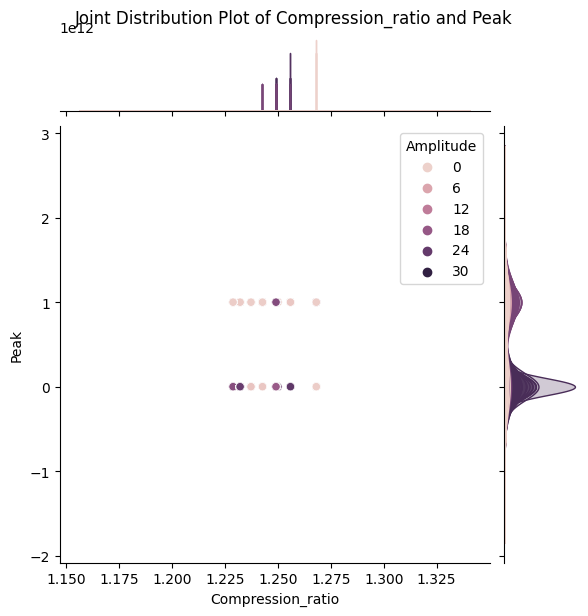

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]
data_for_visualization = df[selected_parameters].dropna()  # Removing rows with missing values

# Create joint distribution plots for each pair of parameters with color based on Amplitude
sns.jointplot(x="Amplitude", y="Res_Freq", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Amplitude and Res_Freq", y=1.02)
plt.show()

sns.jointplot(x="Amplitude", y="Compression_ratio", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Amplitude and Compression_ratio", y=1.02)
plt.show()

sns.jointplot(x="Amplitude", y="Peak", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Amplitude and Peak", y=1.02)
plt.show()

sns.jointplot(x="Res_Freq", y="Compression_ratio", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Res_Freq and Compression_ratio", y=1.02)
plt.show()

sns.jointplot(x="Res_Freq", y="Peak", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Res_Freq and Peak", y=1.02)
plt.show()

sns.jointplot(x="Compression_ratio", y="Peak", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Compression_ratio and Peak", y=1.02)
plt.show()


MSE :  57.77382396920745
RMSE :  7.600909417247876
R2 :  0.30824009448218015


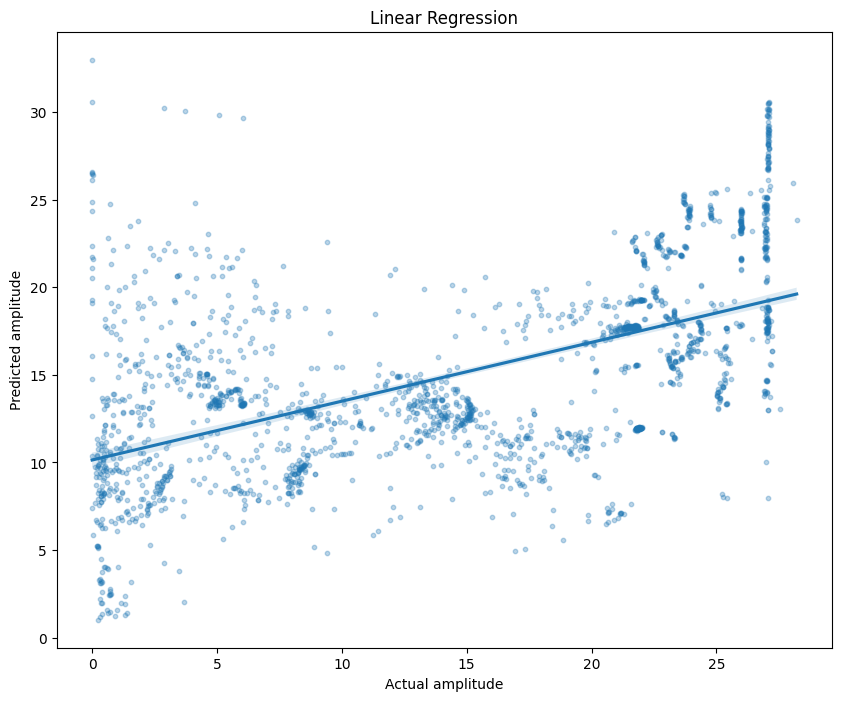

In [38]:
# plot correlation by machine learning 
# 1. Linear Regression
# 2. Random Forest
# 3. XGBoost
# 4. LightGBM
# 5. CatBoost

# first : linear regression

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# import data

data = pd.read_csv('cleaned_data.csv')

# split data into train and test

from sklearn.model_selection import train_test_split

X = data.drop(['Amplitude'], axis = 1)
y = data['Amplitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

# linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# predict

y_pred = lr.predict(X_test)

# evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE : ', mse)
print('RMSE : ', rmse)
print('R2 : ', r2)

# plot

plt.figure(figsize = (10, 8))
sns.regplot(x = y_test, y = y_pred, scatter_kws = {'s' : 10, 'alpha' : 0.3})
plt.xlabel('Actual amplitude')
plt.ylabel('Predicted amplitude')
plt.title('Linear Regression')
plt.show()


MSE :  751974.5994670425
RMSE :  867.1646899332575
R2 :  0.2937520987107525


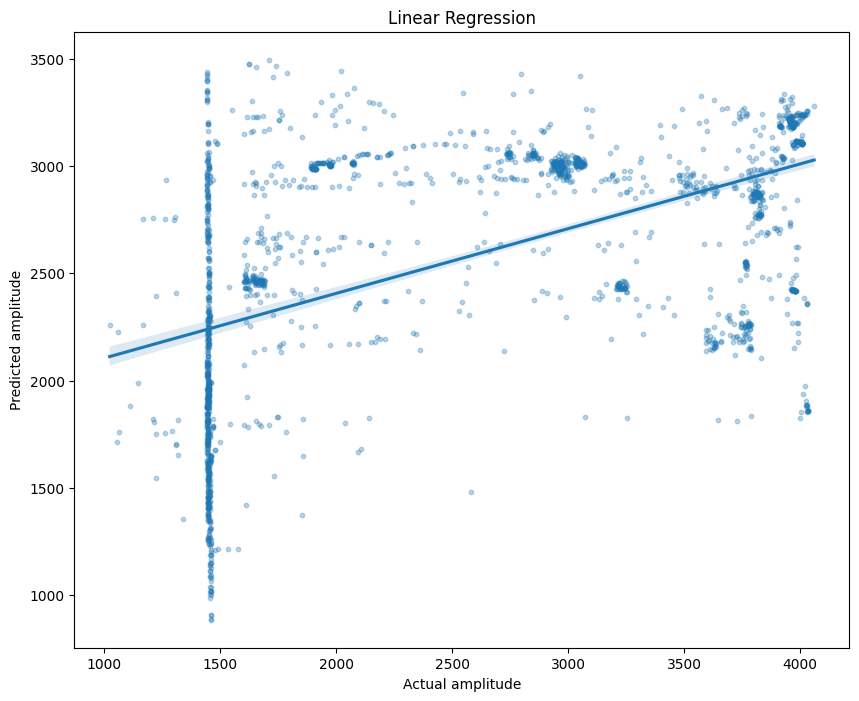

In [39]:
# plot correlation by machine learning 
# 1. Linear Regression
# 2. Random Forest
# 3. XGBoost
# 4. LightGBM
# 5. CatBoost

# first : linear regression

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# import data

data = pd.read_csv('cleaned_data.csv')

# split data into train and test

from sklearn.model_selection import train_test_split

X = data.drop(['Res_Freq'], axis = 1)
y = data['Res_Freq']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

# linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# predict

y_pred = lr.predict(X_test)

# evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE : ', mse)
print('RMSE : ', rmse)
print('R2 : ', r2)

# plot

plt.figure(figsize = (10, 8))
sns.regplot(x = y_test, y = y_pred, scatter_kws = {'s' : 10, 'alpha' : 0.3})
plt.xlabel('Actual amplitude')
plt.ylabel('Predicted amplitude')
plt.title('Linear Regression')
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_time_resonance_frequency(data_df, Sample_number):
    group_data = data_df[data_df["Sample_number"] == Sample_number]

    plt.figure(figsize=(10, 6))
    sns.lineplot(x="time", y="res_freq", data=group_data, marker='o', label=f"Sample {Sample_number}")
    plt.xlabel("Time")
    plt.ylabel("Resonance Frequency")
    plt.title(f"Time and Resonance Frequency for Sample {Sample_number}")
    plt.legend()
    plt.show()

def main():
    # Load data from cleaned_data.csv into a DataFrame
    data_df = pd.read_csv("cleaned_data.csv")

    # Group by "sample_number" and plot time and resonance frequency for each group
    unique_sample_numbers = data_df["Sample_number"].unique()
    for sample_number in unique_sample_numbers:
        plot_time_resonance_frequency(data_df, sample_number)

if __name__ == "__main__":
    main()


ValueError: Could not interpret value `time` for parameter `x`

<Figure size 1000x600 with 0 Axes>

Res_Freq - Mean Squared Error: 344390625493893300520226914304.00
Res_Freq - R-squared: -326300826259576525422592.00


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

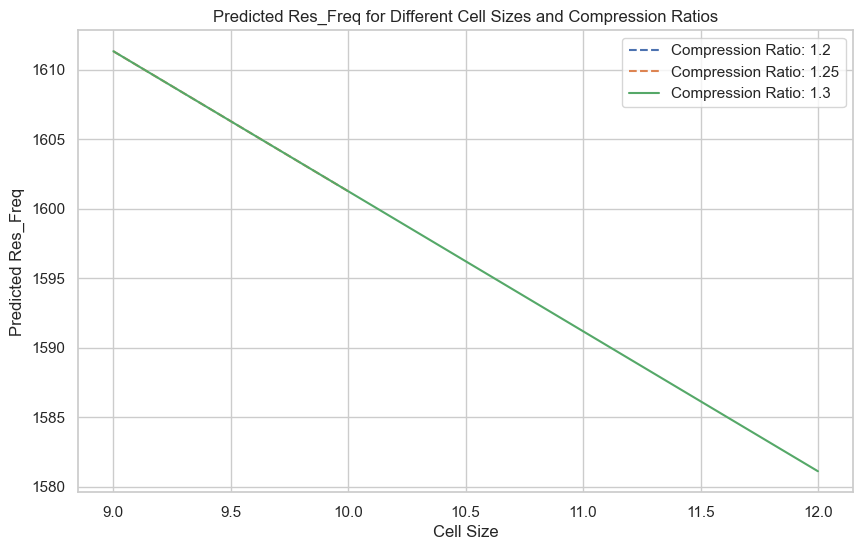

Amplitude - Mean Squared Error: 192.75
Amplitude - R-squared: -1.28


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

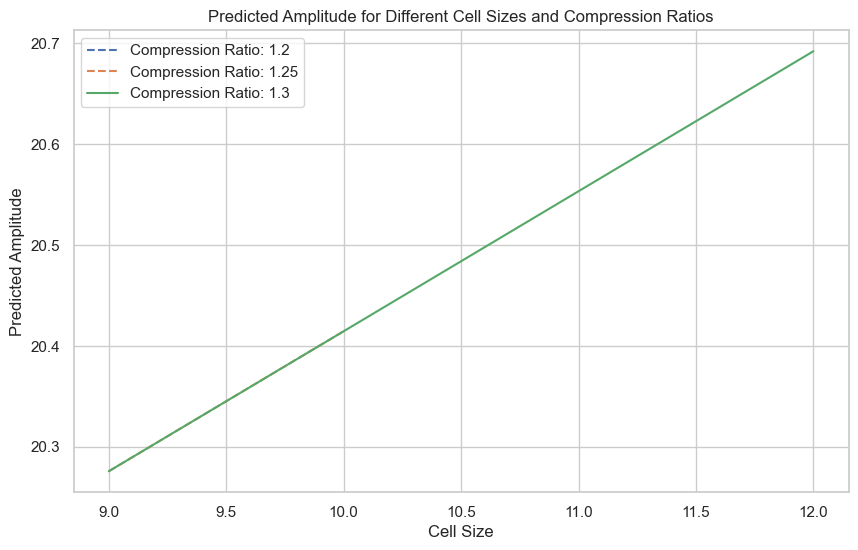

Phase - Mean Squared Error: 933.94
Phase - R-squared: 0.04


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

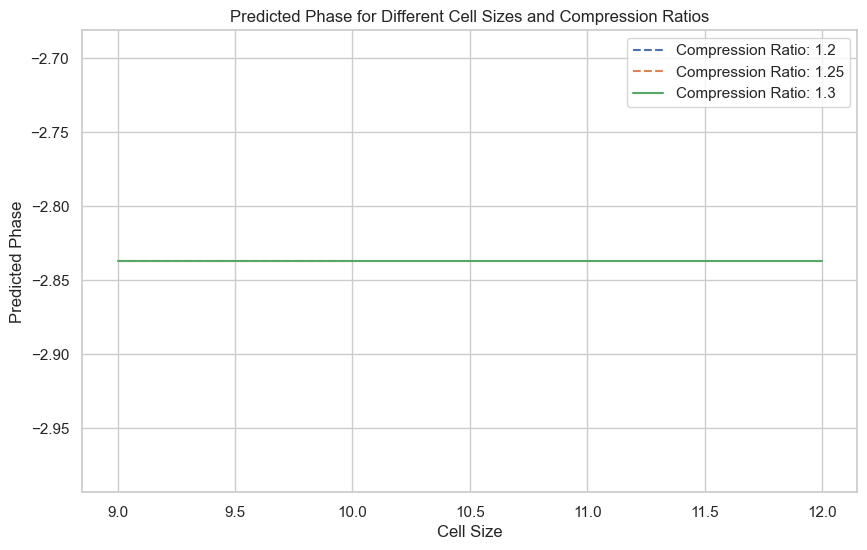

Peak - Mean Squared Error: 689483704442574231044096.00
Peak - R-squared: -2795927675964124739665920.00


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

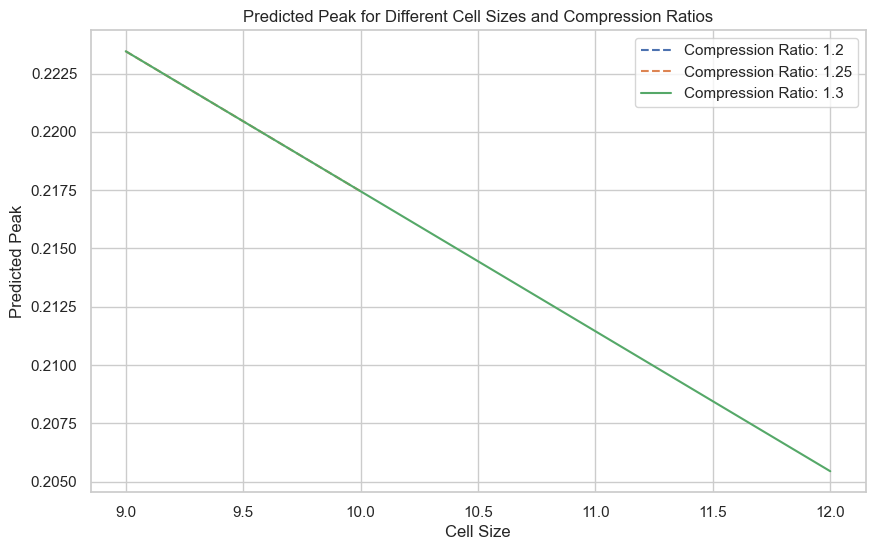

After_compression - Mean Squared Error: 0.00
After_compression - R-squared: 1.00


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

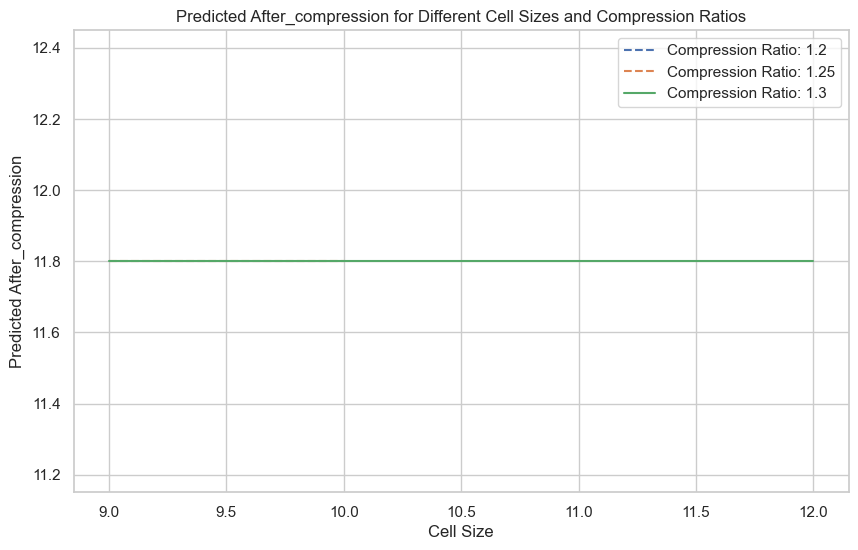

Compression_time - Mean Squared Error: 0.00
Compression_time - R-squared: 1.00


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

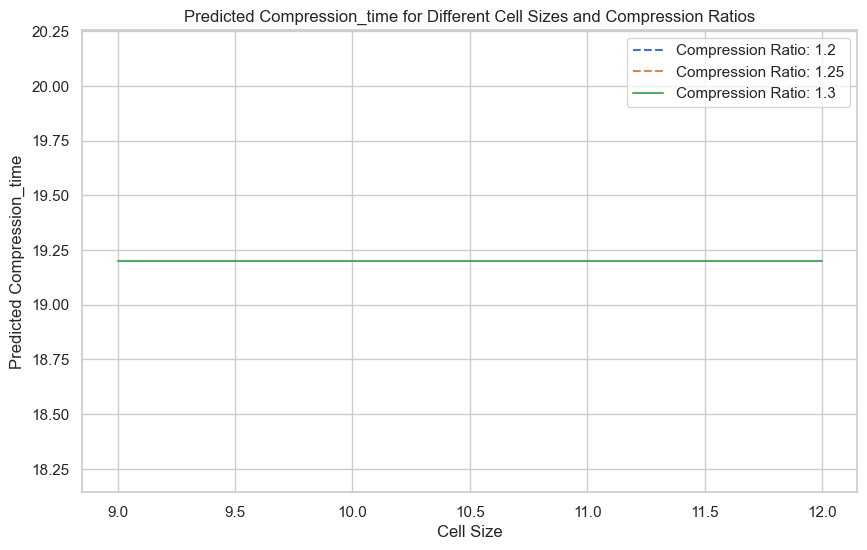

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the data loaded into a DataFrame called df
# If the data is not already loaded, you can do it like this:
# df = pd.read_csv("your_data.csv")

# Function to train and predict based on a target parameter
def train_and_predict(df, target_parameter):
    # Group the data by "sample_number"
    grouped_data = df.groupby("Sample_number")

    # Initialize empty lists to store true and predicted values for each group
    true_values = []
    predicted_values = []

    # Loop through each group and train the model separately
    for sample_number, group_data in grouped_data:
        # Let's create the feature matrix (X) and the target variable (y)
        X = group_data[["Before_compression", "Compression_ratio"]]
        y = group_data[target_parameter]

        # Split the data into 80% training and 20% testing sets for each group
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the Linear Regression model for each group
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        # Make predictions on the test set for each group
        y_pred = regressor.predict(X_test)

        # Append true and predicted values for each group to the respective lists
        true_values.extend(y_test)
        predicted_values.extend(y_pred)

    # Evaluate the overall model's performance using mean squared error and R-squared
    mse = mean_squared_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    print(f"{target_parameter} - Mean Squared Error: {mse:.2f}")
    print(f"{target_parameter} - R-squared: {r2:.2f}")

    # Generate data points for different cell sizes and compression ratios
    cell_sizes = list(range(9, 13))
    compression_ratios = [1.2, 1.25, 1.3]

    # Create subplots to display multiple curves
    plt.figure(figsize=(10, 6))

    # Loop through each compression ratio and plot the curves for different cell sizes
    for i, compression_ratio in enumerate(compression_ratios):
        predicted_values = []
        for cell_size in cell_sizes:
            # Use the trained model to predict the target parameter for the current cell size and compression ratio
            predicted_value = regressor.predict([[cell_size, compression_ratio]])
            predicted_values.append(predicted_value[0])

        # Plot the curve for the current compression ratio
        if i == 0:
            # The last curve is dashed on 1/3rd of the curve
            plt.plot(cell_sizes[:len(cell_sizes) // 3], predicted_values[:len(cell_sizes) // 3],
                     label=f"Compression Ratio: {compression_ratio}", linestyle='dashed')
        elif i == 1:
            # The second curve is dashed on 2/3rd of the curve
            plt.plot(cell_sizes[:2 * len(cell_sizes) // 3], predicted_values[:2 * len(cell_sizes) // 3],
                     label=f"Compression Ratio: {compression_ratio}", linestyle='dashed')
        else:
            # The first curve is continuous
            plt.plot(cell_sizes, predicted_values, label=f"Compression Ratio: {compression_ratio}")

    plt.xlabel("Cell Size")
    plt.ylabel(f"Predicted {target_parameter}")
    plt.title(f"Predicted {target_parameter} for Different Cell Sizes and Compression Ratios")
    plt.legend()
    plt.show()

# Predict and visualize for each target parameter
target_parameters = ["Res_Freq", "Amplitude", "Phase", "Peak", "After_compression", "Compression_time"]
for parameter in target_parameters:
    train_and_predict(df, parameter)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Res_Freq - Mean Squared Error: 344390625493893300520226914304.00
Res_Freq - R-squared: -326300826259576525422592.00


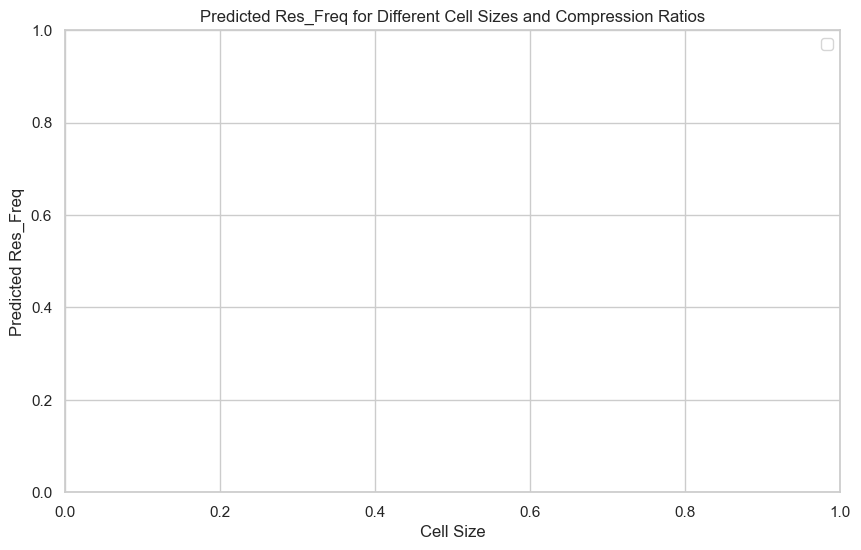

Amplitude - Mean Squared Error: 192.75
Amplitude - R-squared: -1.28


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


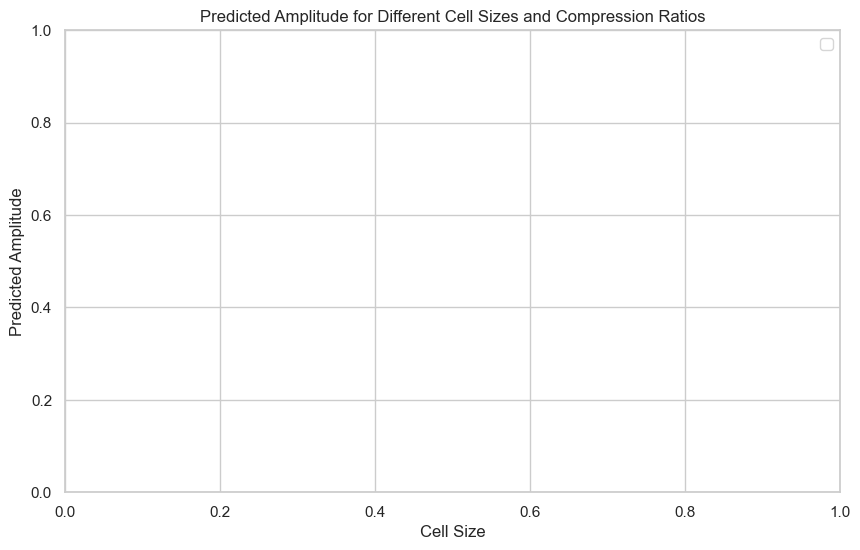

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Phase - Mean Squared Error: 933.94
Phase - R-squared: 0.04


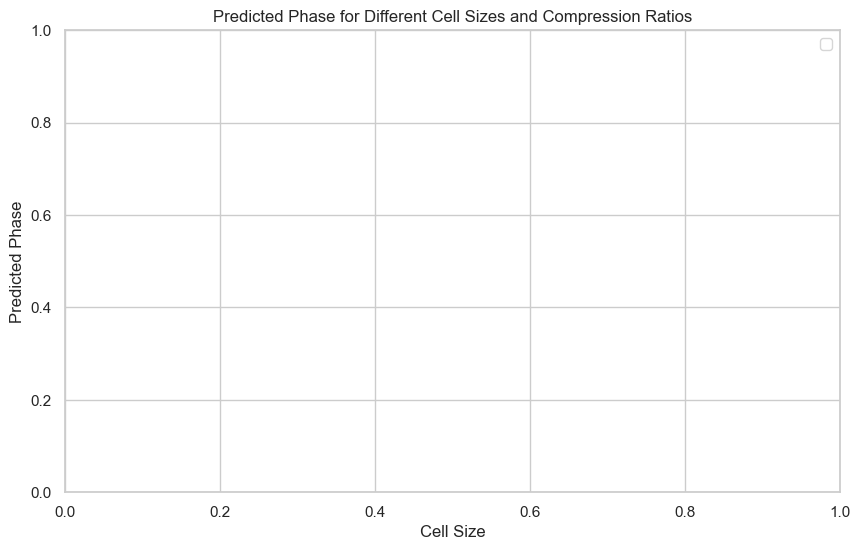

Peak - Mean Squared Error: 689483704442574231044096.00
Peak - R-squared: -2795927675964124739665920.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


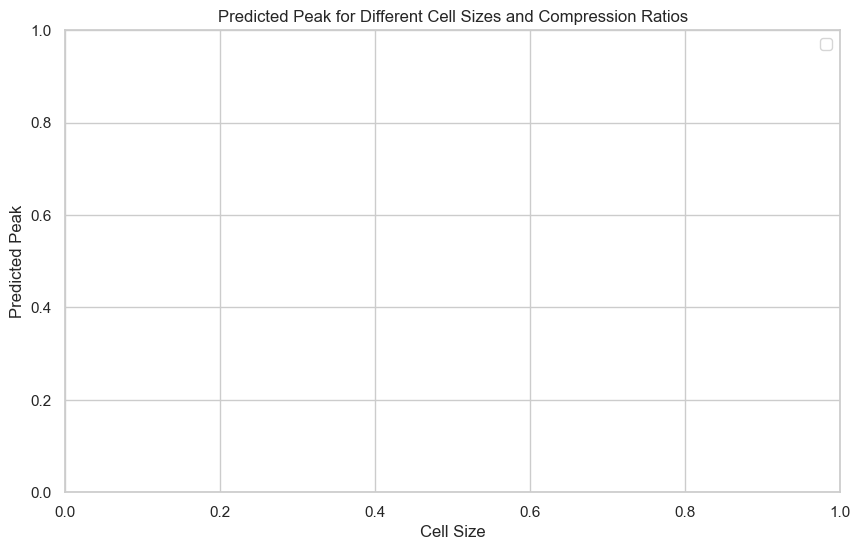

After_compression - Mean Squared Error: 0.00
After_compression - R-squared: 1.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


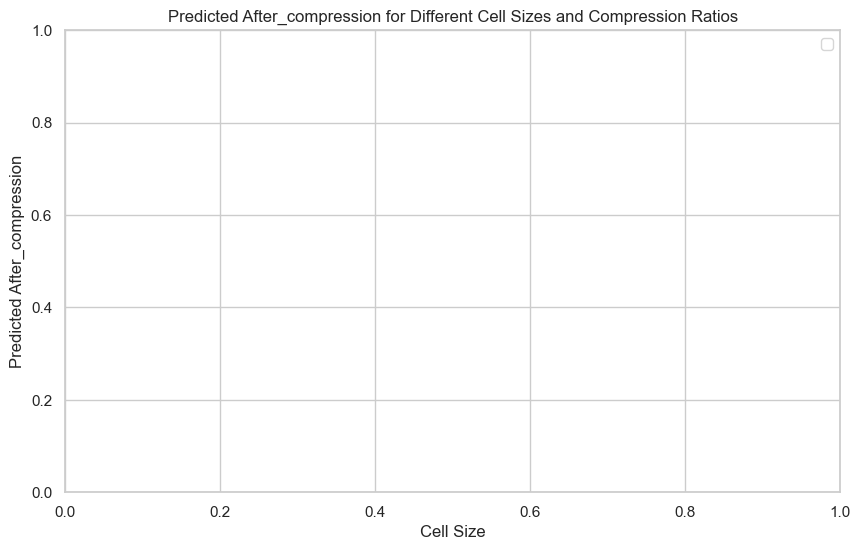

Compression_time - Mean Squared Error: 0.00
Compression_time - R-squared: 1.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


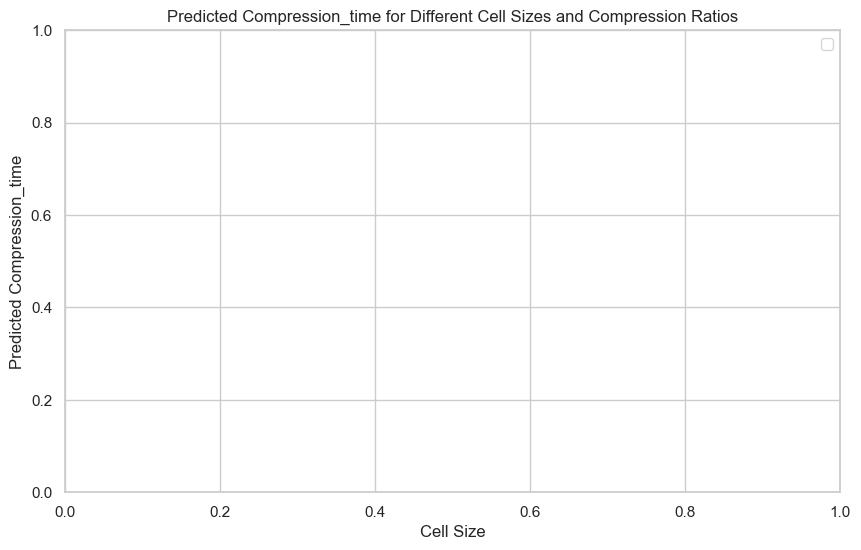

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the data loaded into a DataFrame called df
# If the data is not already loaded, you can do it like this:
# df = pd.read_csv("your_data.csv")

# Function to train and predict based on a target parameter
def train_and_predict(df, target_parameter):
    # Group the data by "sample_number"
    grouped_data = df.groupby("Sample_number")

    # Initialize empty lists to store true and predicted values for each group
    true_values = []
    predicted_values = []

    # Loop through each group and train the model separately
    for sample_number, group_data in grouped_data:
        # Let's create the feature matrix (X) and the target variable (y)
        X = group_data[["Before_compression", "Compression_ratio"]]
        y = group_data[target_parameter]

        # Split the data into 80% training and 20% testing sets for each group
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the Linear Regression model for each group
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        # Make predictions on the test set for each group
        y_pred = regressor.predict(X_test)

        # Append true and predicted values for each group to the respective lists
        true_values.extend(y_test)
        predicted_values.extend(y_pred)

    # Evaluate the overall model's performance using mean squared error and R-squared
    mse = mean_squared_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    print(f"{target_parameter} - Mean Squared Error: {mse:.2f}")
    print(f"{target_parameter} - R-squared: {r2:.2f}")

    # Generate data points for different cell sizes and compression ratios
    cell_sizes = list(range(9, 13))
    compression_ratios = [1.2, 1.25, 1.3]

    # Create subplots to display multiple curves
    plt.figure(figsize=(10, 6))

    # Loop through each compression ratio and plot the curves for different cell sizes
    for i, compression_ratio in enumerate(compression_ratios):
        if compression_ratio >= 1.2 and compression_ratio <= 1.3:
            continue  # Ignore the specified range of compression ratios
        predicted_values = []
        for cell_size in cell_sizes:
            if cell_size >= 9 and cell_size <= 12:
                continue  # Ignore the specified range of cell sizes
            # Use the trained model to predict the target parameter for the current cell size and compression ratio
            predicted_value = regressor.predict([[cell_size, compression_ratio]])
            predicted_values.append(predicted_value[0])

        # Plot the curve for the current compression ratio
        if i == 0:
            # The last curve is dashed on 1/3rd of the curve
            plt.plot([cs for cs in cell_sizes if cs < 12],
                     predicted_values[:len(cell_sizes) // 3],
                     label=f"Compression Ratio: {compression_ratio}", linestyle='dashed')
        elif i == 1:
            # The second curve is dashed on 2/3rd of the curve
            plt.plot([cs for cs in cell_sizes if cs < 12],
                     predicted_values[:2 * len(cell_sizes) // 3],
                     label=f"Compression Ratio: {compression_ratio}", linestyle='dashed')
        else:
            # The first curve is continuous
            plt.plot([cs for cs in cell_sizes if cs < 12],
                     predicted_values, label=f"Compression Ratio: {compression_ratio}")

    plt.xlabel("Cell Size")
    plt.ylabel(f"Predicted {target_parameter}")
    plt.title(f"Predicted {target_parameter} for Different Cell Sizes and Compression Ratios")
    plt.legend()
    plt.show()

# Predict and visualize for each target parameter
target_parameters = ["Res_Freq", "Amplitude", "Phase", "Peak", "After_compression", "Compression_time"]
for parameter in target_parameters:
    train_and_predict(df, parameter)


In [ ]:
# now do it but while opening cleaned_data_neo.csv
def reload_neo_df():
    return pd.read_csv('cleaned_data_neo.csv')

reload_neo_df()

Time     Res_Freq  Amplitude  Phase  Sample_number  Peak  \
0     148.500494  1621.852374      5.542 -81.65              1     0   
1     148.603500  1621.852374      5.542 -81.65              1     0   
2     118.599783  1820.630283      4.908 -87.55              2     0   
3     118.699789  1783.184958      5.558 -86.38              2     0   
4     118.799795  1752.469254      6.480 -83.83              2     0   
...          ...          ...        ...    ...            ...   ...   
1131  112.949461  1365.949739     10.146  -5.13              8     0   
1132  217.849460  1366.560750     10.094  -5.15              8     0   
1133  148.849514  1366.158514     10.152  -5.24              8     0   
1134  264.912152  1367.051535      9.996  -5.02              8     0   
1135  116.299652  1365.992666     10.158  -5.11              8     0   

      Before_compression  After_compression  Compression_ratio  \
0                  14.60              11.80           1.237288   
1                  14.60              11.80           1.237288   
2                  14.49              11.16           1.298387   
3                  14.49              11.16           1.298387   
4                  14.49              11.16           1.298387   
...                  ...                ...                ...   
1131               15.82              12.83           1.233048   
1132               15.82              12.83           1.233048   
1133               15.82              12.83           1.233048   
1134               15.82              12.83           1.233048   
1135               15.82              12.83           1.233048   

      Compression_time  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1131                 0  
1132                 0  
1133                 0  
1134                 0  
1135                 0  

[1136 rows x 10 columns]

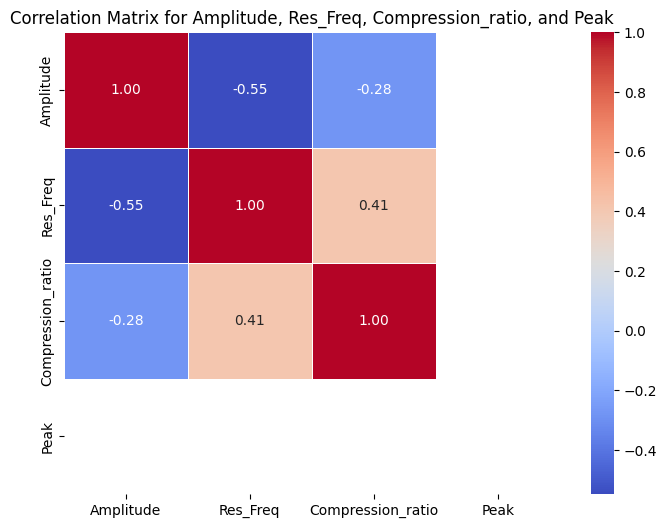

In [ ]:
# display heatmap
# display confusion matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def main():
    # Load data from cleaned_data_neo.csv into a DataFrame
    data_df = pd.read_csv("cleaned_data_neo.csv")

    # Select the parameters for the correlation heatmap
    selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]

    # Create a subset of the data with selected parameters
    data_for_heatmap = data_df[selected_parameters]

    # Calculate the correlation matrix
    correlation_matrix = data_for_heatmap.corr()

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix for Amplitude, Res_Freq, Compression_ratio, and Peak")
    plt.show()

if __name__ == "__main__":
    main()


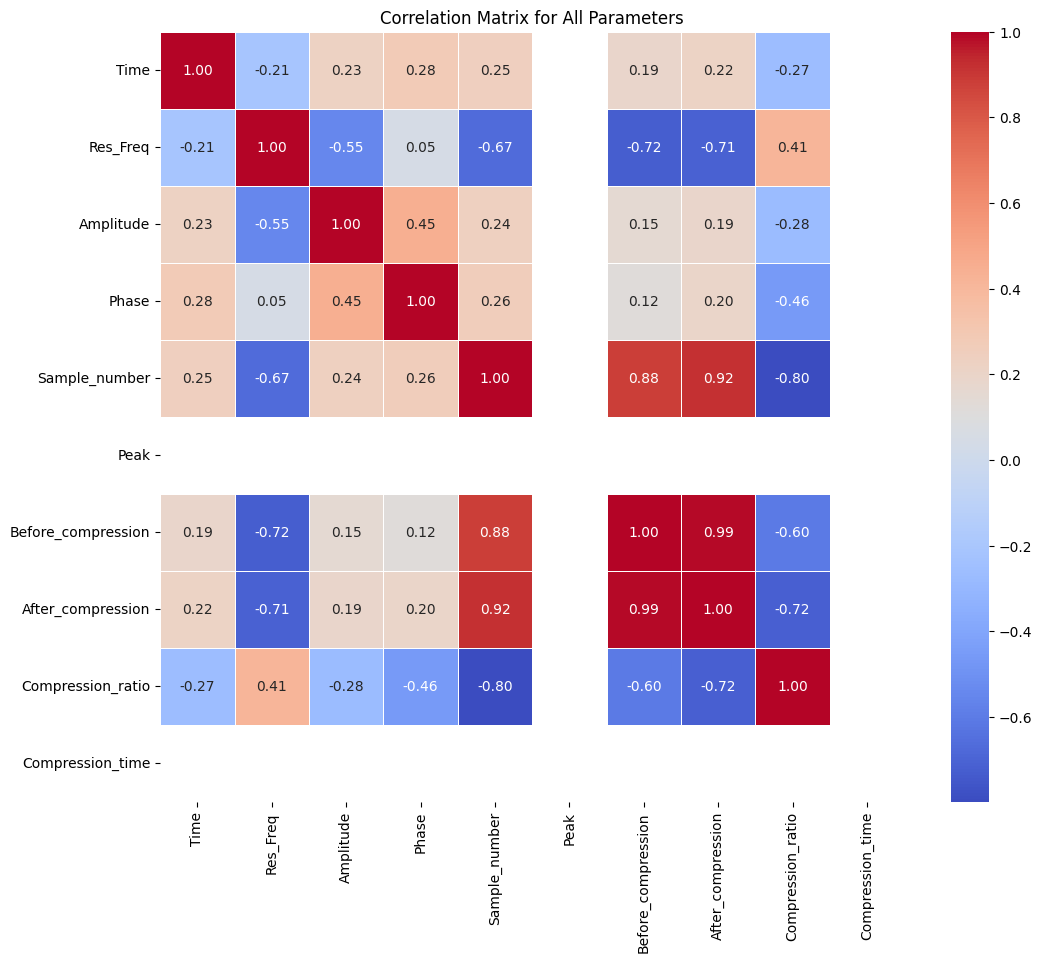

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def main():
    # Load data from cleaned_data_neo.csv into a DataFrame
    data_df = pd.read_csv("cleaned_data_neo.csv")

    # Calculate the correlation matrix for all parameters
    correlation_matrix = data_df.corr()

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix for All Parameters")
    plt.show()

if __name__ == "__main__":
    main()


In [45]:
import pandas as pd

# Assuming you have the data loaded into a DataFrame called df
# If the data is not already loaded, you can do it like this:
# df = pd.read_csv("your_data.csv")
df = reload_df()
# Let's create the feature matrix (X) and the target variable (y)
X = df[["Before_compression", "Compression_ratio"]]
y = df["Peak"]
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Example of using the model for prediction with new data
new_data = pd.DataFrame({"Before_compression": [10.0], "Compression_ratio": [1.20]})
predicted_peak = regressor.predict(new_data)
print(f"Predicted Resonance Frequency Peak: {predicted_peak[0]:.2f}")


Mean Squared Error: 0.20
R-squared: 0.18
Predicted Resonance Frequency Peak: 0.50


Mean Squared Error: 0.20
R-squared: 0.18


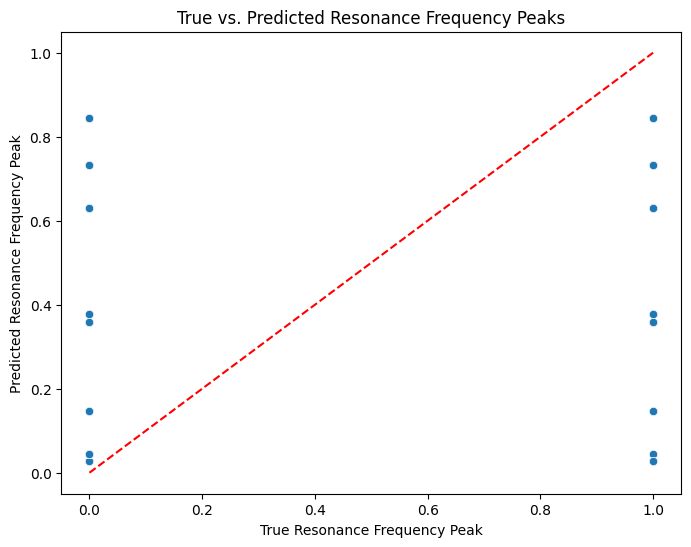

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the data loaded into a DataFrame called df
# If the data is not already loaded, you can do it like this:
# df = pd.read_csv("your_data.csv")

# Let's create the feature matrix (X) and the target variable (y)
X = df[["Before_compression", "Compression_ratio"]]
y = df["Peak"]

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the predicted values against the true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Resonance Frequency Peak")
plt.ylabel("Predicted Resonance Frequency Peak")
plt.title("True vs. Predicted Resonance Frequency Peaks")
plt.show()


Mean Squared Error: 818808.71
R-squared: 0.23


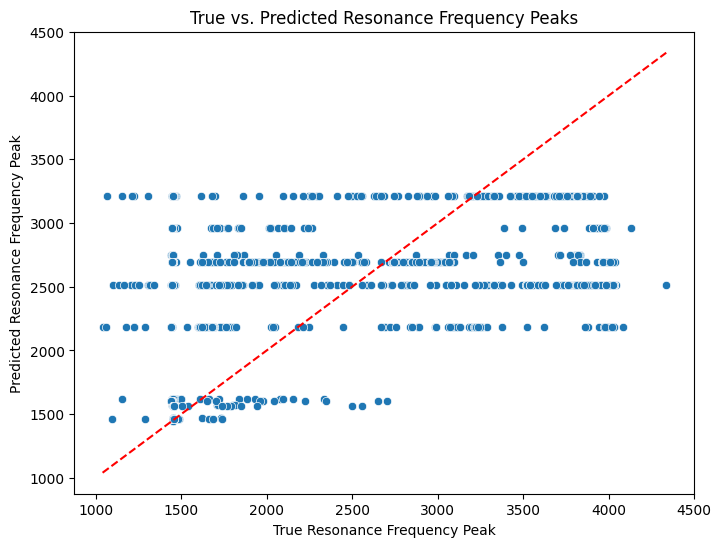

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the data loaded into a DataFrame called df
# If the data is not already loaded, you can do it like this:
# df = pd.read_csv("your_data.csv")

# Group the data by "sample_number"
grouped_data = df.groupby("Sample_number")

# Initialize empty lists to store true and predicted values for each group
true_values = []
predicted_values = []

# Loop through each group and train the model separately
for sample_number, group_data in grouped_data:
    # Let's create the feature matrix (X) and the target variable (y)
    X = group_data[["Before_compression", "Compression_ratio"]]
    y = group_data["Res_Freq"]

    # Split the data into 80% training and 20% testing sets for each group
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

    # Create and train the Random Forest Regressor model for each group
    regressor = RandomForestRegressor(random_state=30)
    regressor.fit(X_train, y_train)

    # Make predictions on the test set for each group
    y_pred = regressor.predict(X_test)

    # Append true and predicted values for each group to the respective lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

# Evaluate the overall model's performance using mean squared error and R-squared
mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the true vs. predicted values for all groups
plt.figure(figsize=(8, 6))
sns.scatterplot(x=true_values, y=predicted_values)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--')
plt.xlabel("True Resonance Frequency Peak")
plt.ylabel("Predicted Resonance Frequency Peak")
plt.title("True vs. Predicted Resonance Frequency Peaks")
plt.show()


Mean Squared Error: 0.19
R-squared: 0.24


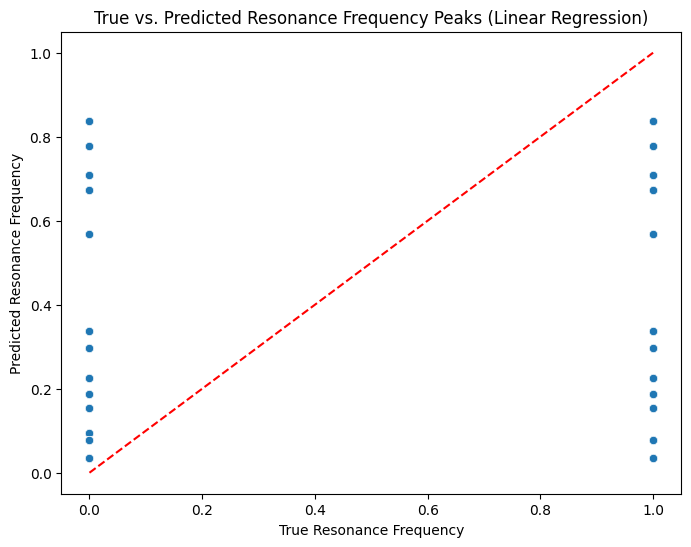

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the data loaded into a DataFrame called df
# If the data is not already loaded, you can do it like this:
# df = pd.read_csv("your_data.csv")

# Group the data by "sample_number"
grouped_data = df.groupby("Sample_number")

# Initialize empty lists to store true and predicted values for each group
true_values = []
predicted_values = []

# Loop through each group and train the model separately
for sample_number, group_data in grouped_data:
    # Let's create the feature matrix (X) and the target variable (y)
    X = group_data[["Before_compression", "Compression_ratio"]]
    y = group_data["Peak"]

    # Split the data into 80% training and 20% testing sets for each group
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the tree regressor model
    regressor = RandomForestRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    # Make predictions on the test set for each group
    y_pred = regressor.predict(X_test)

    # Append true and predicted values for each group to the respective lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

# Evaluate the overall model's performance using mean squared error and R-squared
mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the true vs. predicted values for all groups
plt.figure(figsize=(8, 6))
sns.scatterplot(x=true_values, y=predicted_values)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--')
plt.xlabel("True Resonance Frequency")
plt.ylabel("Predicted Resonance Frequency")
plt.title("True vs. Predicted Resonance Frequency Peaks (Linear Regression)")
plt.show()

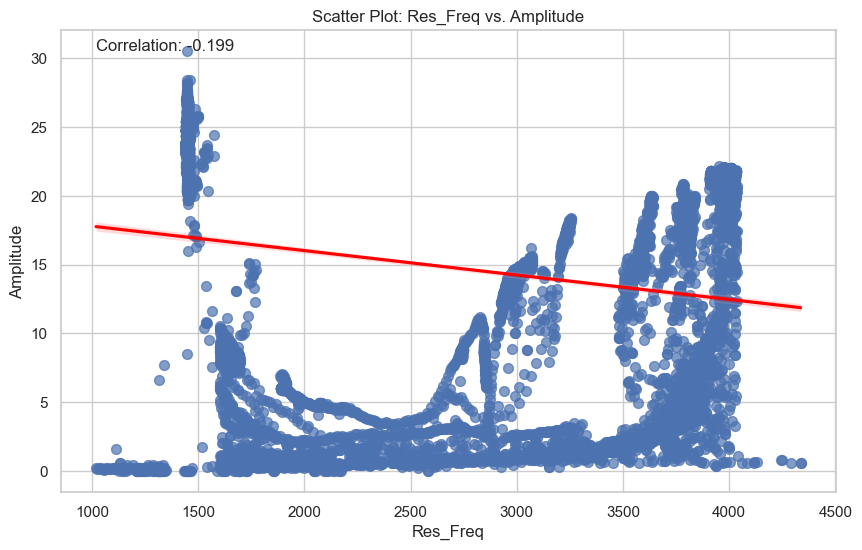

In [60]:
df= reload_df()

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(x='Res_Freq', y='Amplitude', data=df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.xlabel('Res_Freq')
plt.ylabel('Amplitude')

plt.title('Scatter Plot: Res_Freq vs. Amplitude')
plt.text(df['Res_Freq'].min(), df['Amplitude'].max(), f'Correlation: {df.corr().loc["Res_Freq", "Amplitude"]:.3f}', fontsize=12)
plt.grid(True)
plt.show()

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df= reload_df()
# Assuming you have the data loaded into a DataFrame called df
# If the data is not already loaded, you can do it like this:
# df = pd.read_csv("your_data.csv")

# Group the data by "sample_number"
grouped_data = df.groupby("Sample_number")

# Initialize empty lists to store true and predicted values for each group
true_values = []
predicted_values = []

# Loop through each group and train the model separately
for sample_number, group_data in grouped_data:
    # Let's create the feature matrix (X) and the target variable (y)
    X = group_data[["Before_compression", "Compression_ratio"]]
    y = group_data["Res_Freq"]

    # Split the data into 80% training and 20% testing sets for each group
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model for each group
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Make predictions on the test set for each group
    y_pred = regressor.predict(X_test)

    # Append true and predicted values for each group to the respective lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

# Evaluate the overall model's performance using mean squared error and R-squared
mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Prompt the user to enter values for cell size and compression ratio
cell_size = float(input("Enter cell size: "))
compression_ratio = float(input("Enter compression ratio: "))

# Use the trained model to predict the resonance frequency peak for the entered values
predicted_peak = regressor.predict([[cell_size, compression_ratio]])
print(f"Predicted Resonance Frequency Peak: {predicted_peak[0]:.2f}")


Mean Squared Error: 344390625493893300520226914304.00
R-squared: -326300826259576525422592.00


ValueError: could not convert string to float: ''

Mean Squared Error: 344390625493893300520226914304.00
R-squared: -326300826259576525422592.00


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

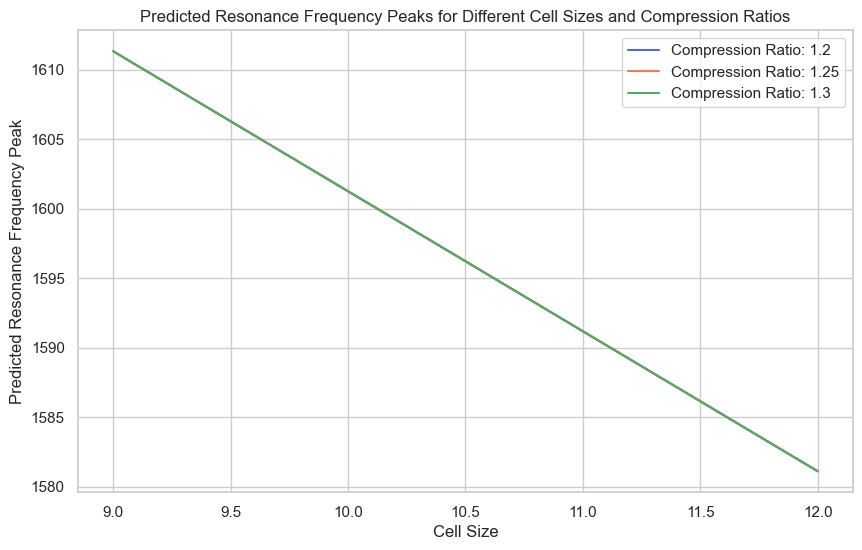

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the data loaded into a DataFrame called df
# If the data is not already loaded, you can do it like this:
# df = pd.read_csv("your_data.csv")

# Group the data by "sample_number"
grouped_data = df.groupby("Sample_number")

# Initialize empty lists to store true and predicted values for each group
true_values = []
predicted_values = []

# Loop through each group and train the model separately
for sample_number, group_data in grouped_data:
    # Let's create the feature matrix (X) and the target variable (y)
    X = group_data[["Before_compression", "Compression_ratio"]]
    y = group_data["Res_Freq"]

    # Split the data into 80% training and 20% testing sets for each group
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model for each group
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Make predictions on the test set for each group
    y_pred = regressor.predict(X_test)

    # Append true and predicted values for each group to the respective lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

# Evaluate the overall model's performance using mean squared error and R-squared
mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Generate data points for different cell sizes and compression ratios
cell_sizes = list(range(9, 13))
compression_ratios = [1.2, 1.25, 1.3]

# Create subplots to display multiple curves
plt.figure(figsize=(10, 6))

# Loop through each compression ratio and plot the curves for different cell sizes
for compression_ratio in compression_ratios:
    predicted_peaks = []
    for cell_size in cell_sizes:
        # Use the trained model to predict the resonance frequency peak for the current cell size and compression ratio
        predicted_peak = regressor.predict([[cell_size, compression_ratio]])
        predicted_peaks.append(predicted_peak[0])

    # Plot the curve for the current compression ratio
    plt.plot(cell_sizes, predicted_peaks, label=f"Compression Ratio: {compression_ratio}")

plt.xlabel("Cell Size")
plt.ylabel("Predicted Resonance Frequency Peak")
plt.title("Predicted Resonance Frequency Peaks for Different Cell Sizes and Compression Ratios")
plt.legend()
plt.show()


In [ ]:
# 